# 1. Генерация данных

In [97]:
# Подключим необходимые библиотеки
import numpy as np
import pandas as pd
import scipy as scipy
from copy import deepcopy
import math
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from scipy.stats import t, chi2, f, norm, poisson, binom, uniform, expon, logistic
import seaborn
import networkx as nx
from sklearn.model_selection import train_test_split

Описание:

**Целевая переменная**
*   Цена 1 кв м жилой недвижимости (price)

**Переменная воздействия**
*   Наличие станции метро в шаговой доступности / 10 мин ходьбы (subway)

**Инструментальная переменная**
*   Наличие автобусной / трамвайной остановки в шаговой доступности / 10 мин ходьбы (bus)

**Контрольные переменные:**
*   Количество этажей в доме (floor)
*   Год постройки дома (year_built)
*   Общая площадь квартиры (flat_area)
*   Площадь кухни (kitchen)
*   Площадь ванной комнаты (bathroom)
*   Количество комнат (rooms)
*   Этаж квартиры (floor_flat)
*   Наличие ванной (bath)
*   Тип ремонта (renovation)
*   Парковка (parking)
*   Первичная продажа жилой недвижимости / Вторичная продажа (primary)
*   Расположение жилья в пределах МКАДа (mkad)

**Ненаблюдаемые переменные, порождающие эндогенность**:
*   Качество инфраструктуры района (quality):

Включает в себя общее состояние дорог, наличие парков, образовательных учреждений и других социальных услуг. Высокое качество инфраструктуры может способствовать повышению цен на жильё. Так как качество инфраструктуры не наблюдается напрямую, оно может создать смещение в оценках.



**Также можем добавить:**
*   Наличие душевой кабины (shower)
*   Район (zone)
*   Количество комнат
*   Материал стен (walls)







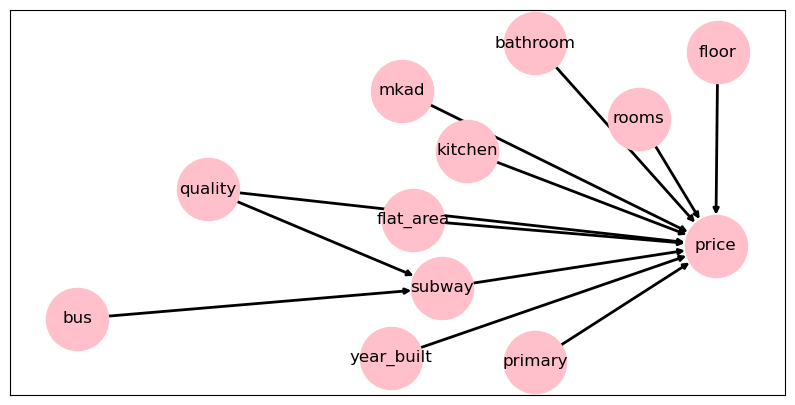

In [99]:
# Визуализируем предполагаемые связи

# Стиль отображения графика
nx_options = {
    'node_color': 'pink',
    'node_size': 2000,
    'width': 2,
    'arrowstyle': '-|>',
    'arrowsize': 8,
}

# Связи
edges = [
    ('floor', 'price'),         # (откуда стрелочка, куда стрелочка)
    ('year_built', 'price'),
    ('flat_area', 'price'),
    ('kitchen', 'price'),
    ('bathroom', 'price'),
    ('rooms', 'price'),
    # ('floor_flat', 'price'),
    # ('bath', 'price'),
    # ('renovation', 'price'),
    # ('parking', 'price'),
    ('primary', 'price'),
    ('mkad', 'price'),
    ('subway', 'price'),
    ('quality', 'price'),
    ('quality', 'subway'),
    ('bus', 'subway'),

]

# Инициализируем граф
G = nx.DiGraph(directed = True)
G.add_edges_from(edges)

# размеры графа
plt.figure(figsize=(10, 5))

# Отображаем граф
np.random.seed(8)
nx.draw_networkx(G, arrows = True, **nx_options)
plt.show()

In [100]:
# Число наблюдений
n = 10000

# Для воспроизводимости
np.random.seed(123)

## Контрольные переменные

[14. 35. 28. 10. 19. 42.  1. 21. 38. 16.]


<Axes: ylabel='Density'>

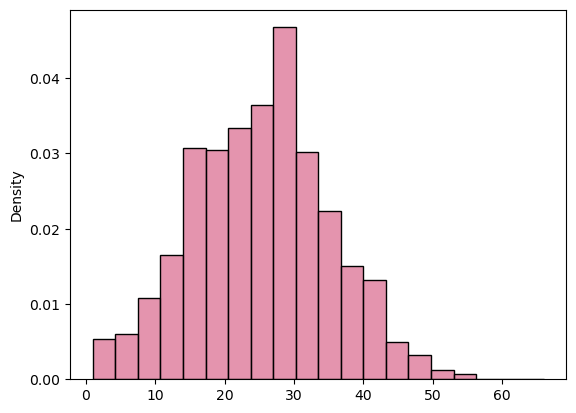

In [102]:
# Предположим, что распределение этажности дома схоже с нормальным
floor = norm.rvs(size = n, loc = 25, scale = 10)

# Для красоты ограничим минимальные и максимальные значения
floor[floor >= 85] = 85
floor[floor <= 1]  = 1

# Также, для удобства введем округление
floor = np.round(floor)

# Посмотрим на несколько первых значений
print(floor[0:10])

# Посмотрим на распределение
seaborn.histplot(floor,
                 stat = 'density',
                 color = "palevioletred",
                 label = "histogram",
                 bins = 20)

[1968. 1977. 1972. 2004. 1987. 1982. 1975. 1969. 1980. 1976.]


<Axes: ylabel='Density'>

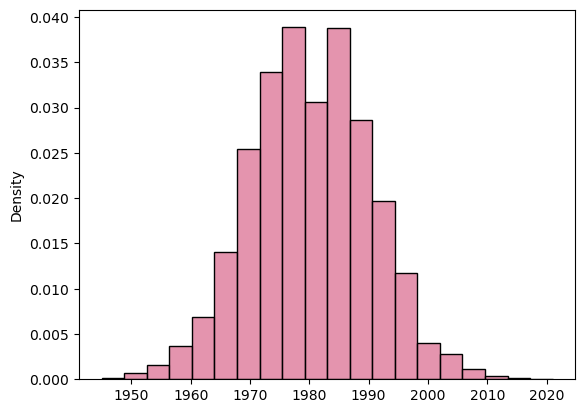

In [103]:
# Предположим, что распределение года постройки дома схоже с нормальным
year_built = norm.rvs(size = n, loc = 1980, scale = 10)

# Для красоты ограничим минимальные и максимальные значения
year_built[year_built >= 2024] = 2024
year_built[year_built <= 1900] = 1900

# Также, для удобства введем округление
year_built = np.round(year_built)

# Посмотрим на несколько первых значений
print(year_built[0:10])

# Посмотрим на распределение
seaborn.histplot(year_built,
                 stat = 'density',
                 color = "palevioletred",
                 label = "histogram",
                 bins = 20)

[126. 181.  51. 111.  15.  30. 223.  42.  64.  57.]


<Axes: ylabel='Density'>

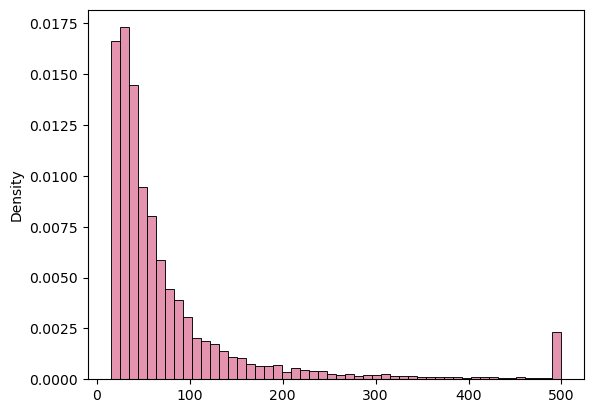

In [104]:
# Предположим, что распределение площади квартиры схоже с нормальным со смещением влево
flat_area = norm.rvs(size = n, loc = 0.3, scale = 0.15)

#restore the skewed one
flat_area = np.exp(flat_area)

#Try to make it more skewed
N = 2
for i in range(N):
  flat_area = np.exp(flat_area)


# Для красоты ограничим минимальные и максимальные значения
flat_area[flat_area >= 500] = 500
flat_area[flat_area <= 15]  = 15

# Также, для удобства введем округление
flat_area = np.round(flat_area)

# удалим выбросы с 500 кв м
# flat_area = flat_area[flat_area < 500]
# так нельзя, потому что у нас будет не 10к наблюдений тогда (что делать?????)

# Посмотрим на несколько первых значений
print(flat_area[0:10])

seaborn.histplot(flat_area,
                 stat = 'density',
                 color = "palevioletred",
                 label = "histogram",
                 bins = 50)

In [105]:
flat_area[0:10]

array([126., 181.,  51., 111.,  15.,  30., 223.,  42.,  64.,  57.])

[15. 16. 29. 29. 27. 18. 17. 18. 25. 23.]


<Axes: ylabel='Density'>

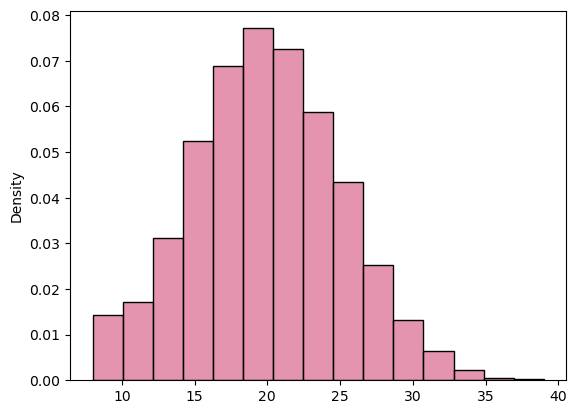

In [106]:
# Предположим, что распределение площади кухни схоже с нормальным
kitchen = norm.rvs(size = n, loc = 20, scale = 5)

# Для красоты ограничим минимальные и максимальные значения
kitchen[kitchen >= 40] = 40
kitchen[kitchen <= 8]  = 8

# Также, для удобства введем округление
kitchen = np.round(kitchen)

# Посмотрим на несколько первых значений
print(kitchen[0:10])

# Посмотрим на распределение
seaborn.histplot(kitchen,
                 stat = 'density',
                 color = "palevioletred",
                 label = "histogram",
                 bins = 15)

[7. 5. 4. 6. 6. 5. 4. 3. 5. 4.]


<Axes: ylabel='Density'>

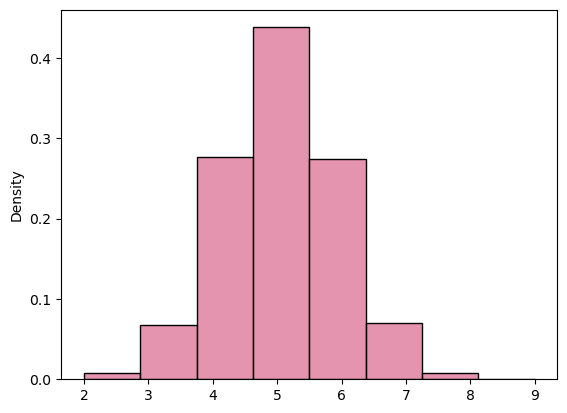

In [107]:
# Предположим, что распределение площади ванной комнаты схоже с нормальным
bathroom = norm.rvs(size = n, loc = 5, scale = 1)

# Для красоты ограничим минимальные и максимальные значения
bathroom[bathroom >= 10] = 10
bathroom[bathroom <= 2]  = 2

# Также, для удобства введем округление
bathroom = np.round(bathroom)

# Посмотрим на несколько первых значений
print(bathroom[0:10])

# Посмотрим на распределение
seaborn.histplot(bathroom,
                 stat = 'density',
                 color = "palevioletred",
                 label = "histogram",
                 bins = 8)

[9. 4. 9. 5. 1. 1. 2. 3. 6. 2.]


<Axes: ylabel='Density'>

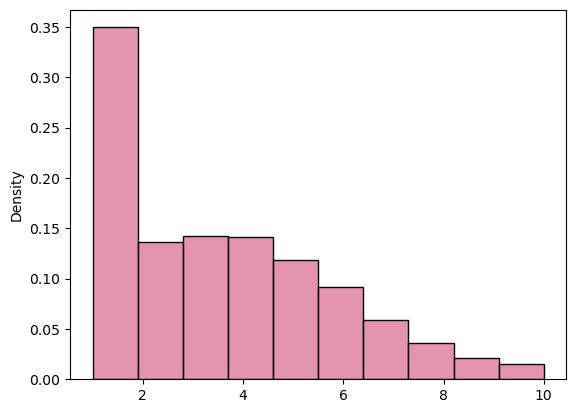

In [108]:
# Предположим, что распределение количества комнат схоже с нормальным
rooms = norm.rvs(size = n, loc = 3, scale = 3)

# Для красоты ограничим минимальные и максимальные значения
rooms[rooms >= 10] = 10
rooms[rooms <= 1] = 1

# Также, для удобства введем округление
rooms = np.round(rooms)

# Посмотрим на несколько первых значений
print(rooms[0:10])

# Посмотрим на распределение
seaborn.histplot(rooms,
                 stat = 'density',
                 color = "palevioletred",
                 label = "histogram",
                 bins = 10)

[29. 12. 18. 36. 18. 35. 22. 22. 19. 31.]


<Axes: ylabel='Density'>

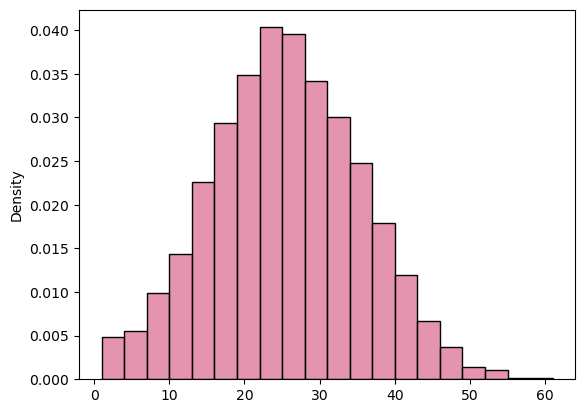

In [109]:
# Предположим, что распределение этажа квартиры схоже с нормальным
floor_flat = norm.rvs(size = n, loc = 25, scale = 10)

# Для красоты ограничим минимальные и максимальные значения
floor_flat[floor_flat >= 85] = 85
floor_flat[floor_flat <= 1]  = 1

# Также, для удобства введем округление
floor_flat = np.round(floor_flat)

# Посмотрим на несколько первых значений
print(floor_flat[0:10])

# Посмотрим на распределение
seaborn.histplot(floor_flat,
                 stat = 'density',
                 color = "palevioletred",
                 label = "histogram",
                 bins = 20)

In [110]:
# Сгенерируем переменную на факт наличия ванной в квартире
bath = np.random.binomial(n = 1, p = 0.6, size = n)
# Посмотрим на первые несколько значение
print(bath[0:10])

# Доля квартир с ванной
print(np.mean(bath))

# Доля квартир с душевой кабиной
print(1-np.mean(bath))

[0 0 1 1 1 0 0 0 0 1]
0.6031
0.39690000000000003


In [111]:
# Сгенерируем дамми-переменную на факт расположения квартиры в пределеах МКАДа (1) и за его пределами (0)
mkad = np.random.binomial(n = 1, p = 0.7, size = n)
# Посмотрим на первые несколько значение
print(mkad[0:10])

# Доля квартир в пределах МКАДа
print(np.mean(mkad))

[1 1 1 0 1 1 1 1 1 1]
0.7002


In [112]:
# Сгенерируем дамми-переменную на факт первичной продажи жилой нежвижимости (1) и вторичной (0)
primary = np.random.binomial(n = 1, p = 0.3, size = n)
# Посмотрим на первые несколько значение
print(primary[0:10])

# Доля квартир в пределах МКАДа
print(np.mean(primary))

[0 1 1 1 1 0 0 0 0 1]
0.3007


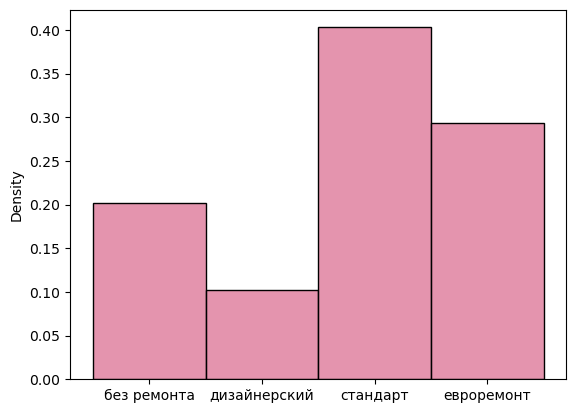

In [113]:
# Генерация категориальной переменной тип ремонта
renovation_options = ['без ремонта', 'стандарт', 'евроремонт', 'дизайнерский']
probabilities = [0.2, 0.4, 0.3, 0.1]
renovation = np.random.choice(renovation_options, size=n, p=probabilities)

# Посмотрим на распределение
seaborn.histplot(renovation,
                 stat = 'density',
                 color = "palevioletred",
                 label = "histogram",
                 bins = 4)

renovation_options = [0, 1, 2, 3]
probabilities = [0.2, 0.4, 0.3, 0.1]
renovation = np.random.choice(renovation_options, size=n, p=probabilities)

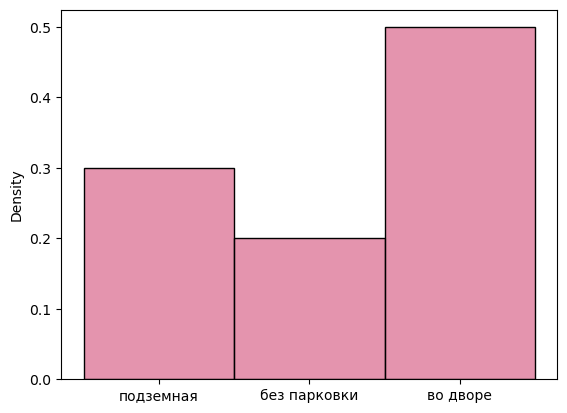

In [114]:
# Генерация категориальной переменной парковка
parking_options = ['без парковки', 'во дворе', 'подземная']
probabilities = [0.2, 0.5, 0.3]
parking = np.random.choice(parking_options, size=n, p=probabilities)

# Посмотрим на распределение
seaborn.histplot(parking,
                 stat = 'density',
                 color = "palevioletred",
                 label = "histogram",
                 bins = 4)

parking_options = [0, 1,2]
probabilities = [0.2, 0.5, 0.3]
parking = np.random.choice(parking_options, size=n, p=probabilities)

[69. 82. 56. 38. 50. 63. 72. 74. 64. 48.]


<Axes: ylabel='Density'>

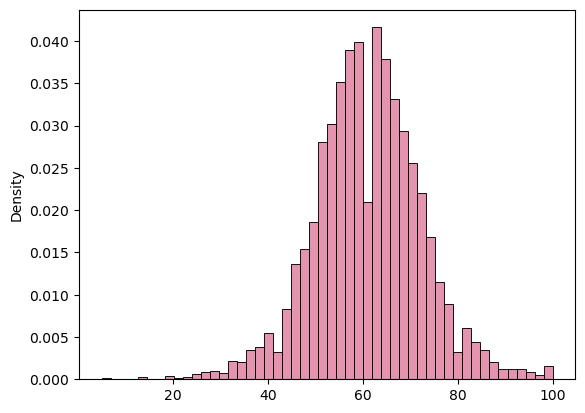

In [115]:
# Генерируем качество инфраструктуры района
quality = t.rvs(size = n, df = 8)

# Приведем переменную к более удобной шкале
quality = (quality) * 10 + 60  # предполагаем, что качество инфраструктуры Москвы выше медианного значения
# качества инфраструктуры других регионов => смещение вправо

# Также, для удобства введем округление и возьмем модуль
quality = np.round(np.abs(quality) + 1)

# Для удобства ограничим максимальное и минимальное значения (создаем шкалу качества от 1 до 100)
quality[quality >= 100] = 100
quality[quality <= 1]   = 1
print(quality[0:10])

# Посмотрим на распределение качестова инфраструктуры района
seaborn.histplot(quality,
                 stat  = 'density',
                 color = "palevioletred",
                 label = "histogram",
                 bins  = 50)

## Инструментальна переменная

Для того, чтобы сгенерировать бинарную переменную как функцию от других переменных, необходимо сперва предположить форму условных вероятностей. Для этого удобно применять следующий алгоритм:

1.   Записать **индекс**, который отражает статистические связи инструментальной переменной с контрольными переменными.
2.   Сформировать условные вероятности взяв функцию распределения от этого индекса

Например, предположим, что условная вероятность факта наличия автобусной или трамвайной остановки около жилого дома положительно связана с годом постройки здания, первичной / вторичной продажей жилья, расположения квартиры в пределах МКАДа и наличия парковки:

$$\text{P}\left(\text{bus}_{i} = 1|\text{year_built}_{i}, \text{primary}_{i}, \text{mkad}_{i}, \text{parking}_{i}\right) = \Phi\left(\underbrace{\frac{0.31 * \text{year_built}_{i}}{ (120 - 1.12*\text{primary}_{i} - \text{mkad}_{i})} + 0.85*\text{mkad}_{i}\times\text{priming}_{i} - 4.5}_{\text{индекс}}\right)$$

Где $\Phi()$ - функция распределения стандартного нормального распределения.

In [117]:
year_built = year_built.astype(float)
primary = primary.astype(float)
mkad = mkad.astype(float)
np.random.seed(123)
# Сформируем индекс
bus_ind = (0.31*year_built)/ (120- 1.12*primary - mkad) +0.5*mkad*primary-4.5

# Создадим условные вероятности
bus_prob = norm.cdf(bus_ind)

# Посмотрим на несколько первых условных вероятностей
print("Условные вероятности:", bus_prob[0:10])

# Сгенерируем наличие остановки общественного транспорта
bus = np.random.binomial(n = 1, p = bus_prob, size = n)

print("Несколько сгенерированных значений:", bus[0:10])
print("Доля остановок общественного транспорта:", np.mean(bus))
print("Дисперсия индекса:", np.var(bus_ind))
print("Дисперсия распределения:", np.var(bus))
print( "Отношение дисперсий:", np.var(bus)/np.var(bus_ind))

Условные вероятности: [0.73457949 0.88475562 0.88217934 0.7660113  0.88978748 0.74639661
 0.74052279 0.73543274 0.74472553 0.88424359]
Несколько сгенерированных значений: [1 1 1 1 1 1 0 1 1 1]
Доля остановок общественного транспорта: 0.7734
Дисперсия индекса: 0.052883064495309794
Дисперсия распределения: 0.17525243999999995
Отношение дисперсий: 3.313961504926461


## Переменная воздействия

Удобно предположить, что условные вероятности переменной воздействия зависят от контрольных переменных, инструментальной переменной и ненаблюдаемой переменной.

<span style="color: black;">
P(\text{subway}_{i} = 1|\text{year_built}_{i}, \text{mkad}_{i}, \text{primary}_{i}, \text{quality}_{i}, \text{bus}_{i}) = 
F_{\text{Logistic}}\left(2.8\times \ln\left(\text{year_built}_{i} + 0.01\right) + \sqrt{\text{bus}_{i}} + 0.54\times\text{mkad}_{i}\times\text{primary}_{i} +0.93\times\text{quality}_{i} - 77\righ
</span>
$$




Где $F_{\text{Logistic}}$ - функция распределения стандартного логистического распределения.

Для краткости введем обозначение для условной вероятности наличия станции метро при наличии/отсутствии остановки общественного транспорта:

<span style="color: black;"> $p_{k}^{\text{subway}_{i}}$ = $P(\text{subway}_{i}$ = $1|\text{year_built}_{i}$, $\text{mkad}_{i}, \text{primary}_{i}$, $\text{quality}_{i}, \text{subway}_{i} = k)$, где $k\in\{0,1\}$ </span>

Для того, чтобы впоследствии анализировать локальные средние эффекты воздействия $\text{LATE}$, необходимо различать величину переменной воздействия $\text{subway}_{i}$ в зависимости от значения инструмента $\text{bus}_{i}$. Для этого рассмотрим ни от чего не зависящую равномерную случайную величину $U_{i}\sim U(0,1)$ и введем гипотетические переменные:

$$\text{subway}_{1i} = I(p_{1}^{\text{bus}_{i}}\geq U_{i})$$

$$\text{subway}_{0i} = I(p_{0}^{\text{bus}_{i}}\geq U_{i})$$


$$I(\text{условие}) = \begin{cases}1\text{, если условие выполнено}\\0\text{, в противном случае}\end{cases}$$

Переменные $\text{subway}_{1i}$ и $\text{subway}_{0i}$ отражают потенциальную возможность наличия метро около квартиры при наличии останоки общественного транспорта.

In [119]:
# Условная вероятность наличия станции метро около жилья
subway_prob = scipy.stats.logistic.cdf(2.8* np.log(year_built + 0.01) + 10.4*bus+ 0.54*mkad * primary + 0.93*quality- 82)

# Факт наличия у индивида высшего образования
subway = np.random.binomial(n = 1, p = subway_prob, size = n)

# Первые несколько значений условных вероятностей переменной
print({'subway': subway[0:10]})
print(pd.DataFrame({'P(educ = 1|X)': np.round(subway_prob[0:10], 2),
                    'educ': subway[0:10]}))

# Доля индивидов с высшим образованием
print(pd.DataFrame(data    =  np.mean(subway),
                   index   = ['P(educ= 1)'],
                   columns = ['Оценка']))

{'subway': array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])}
   P(educ = 1|X)  educ
0           1.00     1
1           1.00     1
2           0.91     1
3           0.00     0
4           0.04     0
5           1.00     1
6           1.00     1
7           1.00     1
8           1.00     1
9           0.01     0
            Оценка
P(educ= 1)  0.6553


Для того, чтобы впоследствии анализировать локальные средние эффекты воздействия $\text{LATE}$, необходимо различать величину переменной воздействия $\text{subway}_{i}$ в зависимости от значения инструмента $\text{bus}_{i}$. Для этого рассмотрим ни от чего не зависящую равномерную случайную величину $U_{i}\sim U(0,1)$ и введем гипотетические переменные:

$$\text{subway}_{1i} = I(P(\text{subway}_{i} = 1|\text{other X}, \text{bus}_{i} = 1)\geq U_{i})$$

$$\text{subway}_{0i} = I(P(\text{subway}_{i} = 1|\text{other X},  \text{bus}_{i} = 0)\geq U_{i})$$

Где:

$$I(\text{условие}) = \begin{cases}1\text{, если условие выполнено}\\0\text{, в противном случае}\end{cases}$$

Наблюдаемый уровень образования можно выразить как:

$$\text{subway}_{i} = \begin{cases}\text{subway}_{1i}\text{, если }\text{bus}_{i} = 1\\ \text{subway}_{0i}\text{, если }\text{bus}_{i} = 0\end{cases}$$

Напомним, что к соблюдателям относятся те, у кого $\text{subway}_{1i} > \text{subway}_{0i}$, то есть получают высшее образование при $\text{bus}_{i}=1$ и не получают - при $\text{bus}_{i} = 0$.

In [121]:
# Пороги
u = scipy.stats.uniform.rvs(size = n)

# Симулируем наличие метро если рядом уже есть остановка общественного транспорта
bus1 = 1
subway_prob1 = scipy.stats.logistic.cdf(
    2.8* np.log(year_built + 0.01) + 10.4*bus1+ 0.54*mkad * primary + 0.91*quality- 82)
subway1 = (subway_prob1 >= u).astype(int)

# Симулируем уровень образования индивидов
# с родителями без высшего образования
bus0 = 0
subway_prob0 = scipy.stats.logistic.cdf(
    0.91* np.log(year_built + 0.01) + 12.4*bus0+ 0.14*mkad * primary + 0.93*quality- 82)
subway0 = (subway_prob0 >= u).astype(int)

# Соблюдатели
compliers = subway1 > subway0

# Факт наличия у индивида высшего образования
subway               = np.zeros(n)
subway[bus == 1] = subway1[bus == 1]
subway[bus == 0] = subway0[bus == 0]

# Доли людей с высшим образованием и соблюдателей
print(pd.DataFrame(data    = [np.mean(compliers), np.mean(subway)],
                   index   = ['P(compliers = 1)', 'P(subway = 1)'],
                   columns = ['Оценка']))

                  Оценка
P(compliers = 1)  0.6654
P(subway = 1)     0.5593


Таким образом, квартиры можно разделить на $4$ группы:

*   **Always takers** - те, у кого $\text{subway}_{0i}=\text{subway}_{1i}=1$: строят станцию метро независимо от наличия/отсутствия остановки общественного траснпорта.
*   **Never takers**- те, у кого $\text{subway}_{0i}=\text{subway}_{1i}=0$: не строят станцию метро независимо от наличия/отсутствия остановки общественного транспорта.
*   **Compliers** - те, у кого $\text{subway}_{1i}=1$ и $\text{subway}_{0i}=0$, то есть $\text{subway}_{1i} > \text{subway}_{0i}$: строят станцию метро лишь в случае, если есть остановка общественного транспорта.
*   **Deniers** - те, у кого $\text{subway}_{1i}=0$ и $\text{subway}_{0i}=1$, то есть $\text{subway}_{1i} < \text{subway}_{0i}$: строят станцию метро лишь в случае, если нет остановки общественного транспорта.

Для соблюдения предпосылок используемых методов важно отсутствие Deniers, что гарантируется используемым процессом генерации данных.

Наблюдаемый (в данных) факт наличия метро можно выразить как:

$$\text{subway}_{i} = \begin{cases}\text{subway}_{1i}\text{, если }\text{bus}_{i} = 1\\ \text{subway}_{0i}\text{, если }\text{bus}_{i} = 0\end{cases} = \\ = \text{subway}_{1i}\times\text{bus}_{i} + \text{subway}_{0i}\times\left(1 - \text{bus}_{i}\right)$$

In [124]:
# Рассмотрим различные группы квартир
ind_type = np.empty(n, dtype = 'U25')
ind_type[(subway1 == 1) & (subway0 == 1)] = 'Always taker'
ind_type[(subway1 == 0) & (subway0 == 0)] = 'Never taker'
ind_type[subway1 > subway0]               = 'Complier'
ind_type[subway1 < subway0]               = 'Denier'

# Посмотрим на распределение квартир разных типов
print(pd.value_counts(ind_type))

# Факт наличия метро около квартиры
subway = subway1 * bus + subway0 * (1 - bus)

# Доли квартир, около которых расположено метро
print(np.mean(subway))

Complier        6654
Never taker     2911
Always taker     435
Name: count, dtype: int64
0.5593


C:\Users\annaz\AppData\Local\Temp\ipykernel_16184\3011261279.py:9: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(ind_type))
C:\Users\annaz\AppData\Local\Temp\ipykernel_16184\3011261279.py:9: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(pd.value_counts(ind_type))


*   При слабой корреляции между $\text{subway}_{i}$ и $\text{quality}_{i}$ проблема эндогенности окажется несущественной, а при слишком большой скорректировать эндоенность окажется чрезвычайно сложно.
*   При слабой корреляции между $\text{subway}_{i}$ и $\text{bus}_{i}$ инструмент не будет релевантным и поэтому не позволит скорректировать эндогенность.

Таким образом, сделаем так, чтобы корреляции находилась в некотором разумном диапазоне:

$$0.8\geq|\text{Corr}\left(\text{subway}_{i}, \text{quality}_{i}\right)|\geq0.2$$

$$0.8\geq|\text{Corr}\left(\text{subway}_{i}, \text{bus}_{i}\right)|\geq0.2$$

In [126]:
# Рассмотрим корреляции
print(pd.DataFrame(data    = [np.corrcoef(subway, quality)[0, 1],
                              np.corrcoef(subway, bus)[0, 1]],
                   index   = ['Corr(subway, quality)',
                              'Corr(subway, bus)'],
                   columns = ['Оценка']))

## Корреляционная матрица
# print(np.round(np.corrcoef([quality, subway, bus, floor, year_built, flat_area, kitchen, bathroom, rooms, floor_flat, primary, mkad]), 2))

                         Оценка
Corr(subway, quality)  0.555023
Corr(subway, bus)      0.565523


## Целевая переменная

Number of compliers1     10000
Среднее: 371192.3454683501
Медиана: 369713.072940191
Мода: ModeResult(mode=13874.98199642671, count=1)


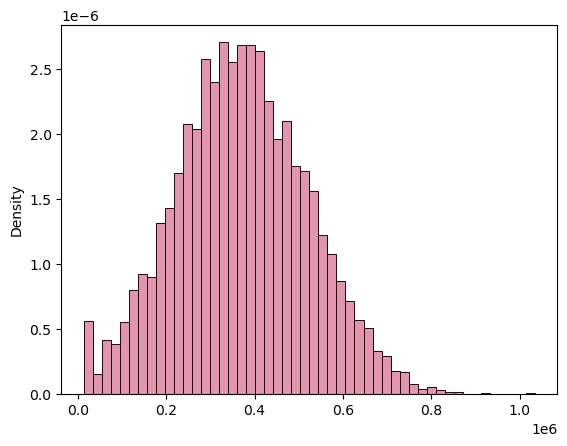

In [128]:
# Случайные ошибки
error0 = t.rvs(size = n, df = 15) * 8
error1 = scipy.stats.expon.rvs(size = n, scale = 10, loc = 0) - 10

# Функция от контрольных переменных
  # когда около квартиры нет метро
g0_obs = 0.9*primary + 0.87*floor + 280*(7*year_built + 5.12*flat_area + 21*kitchen + 160.34*bathroom + 10.11*rooms + bath + renovation + parking + mkad)/ 303.7*floor_flat
g0_unobs =  1.6 * quality
g0       = g0_obs + g0_unobs
  # когда около квартиры есть метро
g1_obs   = 4.2*primary + 0.9*floor +320*(6.4*year_built + 8*flat_area + 22.8*kitchen + 123*bathroom +
                                          17.11*rooms + bath + renovation + parking + mkad)/ 303.7*floor_flat
g1_unobs =  0.9 * quality
g1       = g1_obs + g1_unobs

# Зарплата в зависимости от наличия высшего образования
price0 = g0 + error0
price1 = g1 + error1


compliers1 = price1 > price0
print('Number of compliers1    ', len(compliers1))

# Наблюдаемая цена
price            = np.zeros(n)
price[subway == 0] = price0[subway == 0]
price[subway == 1] = price1[subway == 1]


# Посмотрим на распределение качестова инфраструктуры района
seaborn.histplot(price,
                 stat  = 'density',
                 color = "palevioletred",
                 label = "histogram",
                 bins  = 50)

print("Среднее:", np.mean(price))
print( "Медиана:", np.median(price))
from scipy import stats
print("Мода:", stats.mode(price))

# 2. Описательные статистики

In [130]:
# Аггрегируем данные в датафрейм
df = pd.DataFrame({'price': price, 'subway': subway, 'bus': bus,
                   'floor': floor, 'year_built': year_built,
                   'flat_area': flat_area , 'kitchen': kitchen,
                   'bathroom': bathroom, 'rooms': rooms,
                   'floor_flat': floor_flat, 'bath': bath,
                   'renovation': renovation, 'parking': parking,
                   'primary': primary, 'mkad': mkad,})
df = df.loc[0:n, :]

# Посмотрим на симулированные данные
df.head(10).style.format(precision = 0)

,price,subway,bus,floor,year_built,flat_area,kitchen,bathroom,rooms,floor_flat,bath,renovation,parking,primary,mkad
0,457333,1,1,14,1968,126,15,7,9,29,0,1,2,0,1
1,191713,1,1,35,1977,181,16,5,4,12,0,2,2,1,1
2,272069,1,1,28,1972,51,29,4,9,18,1,1,2,1,1
3,538484,0,1,10,2004,111,29,6,5,36,1,1,2,1,0
4,257837,0,1,19,1987,15,27,6,1,18,1,2,2,1,1
5,515290,1,1,42,1982,30,18,5,1,35,0,1,1,0,1
6,324433,0,0,1,1975,223,17,4,2,22,0,2,1,0,1
7,319293,1,1,21,1969,42,18,3,3,22,0,1,0,0,1
8,289871,1,1,38,1980,64,25,5,6,19,0,0,2,0,1
9,436619,0,1,16,1976,57,23,4,2,31,1,2,1,1,1


In [131]:
## Выведем описательные статистики
# Для непрерывных переменных: выборочное среднее, выборочное стандартное отклонение, медиана, минимум и максимум
statistics = df.describe(percentiles=[0.5]).drop('count')
statistics.rename(index={'50%': 'median'}, inplace=True)
statistics.style.format('{:.0f}')

,price,subway,bus,floor,year_built,flat_area,kitchen,bathroom,rooms,floor_flat,bath,renovation,parking,primary,mkad
mean,371192,1,1,25,1980,80,20,5,3,25,1,1,1,0,1
std,148876,0,0,10,10,94,5,1,2,10,0,1,1,0,0
min,13875,0,0,1,1945,15,8,2,1,1,0,0,0,0,0
median,369713,1,1,25,1980,47,20,5,3,25,1,1,1,0,1
max,1033918,1,1,66,2021,500,39,9,10,61,1,3,2,1,1


In [132]:
#  Для бинарных переменных: доля и количество единиц
p_subway = np.mean(df["subway"])  # оценка P(subway = 1)
p_bus    = np.mean(df["bus"])     # оценка P(bus = 1)
p_primary = np.mean(df["primary"])  # оценка P(primary = 1)
p_mkad   = np.mean(df["mkad"])     # оценка P(mkad = 1)
p_bath = np.mean(df["bath"])  # оценка P(bath = 1)
p_renovation = np.mean(df["renovation"])  # оценка P(renovation = 1)
p_parking    = np.mean(df["parking"])     # оценка P(parking = 1)


binary = pd.DataFrame(data    = [p_subway, p_bus, p_primary, p_mkad, p_bath],
                   index   = ['P(subway = 1)', 'P(bus = 1)', 'P(primary = 1)', 'P(mkad = 1)', 'P(bath = 1)'],
                   columns = ['Доля'])

counts = [df.subway.sum(), df.bus.sum(), df.primary.sum(), df.mkad.sum(), df.bath.sum()]

binary['Количество единиц'] = counts
print(binary)

                  Доля  Количество единиц
P(subway = 1)   0.5593             5593.0
P(bus = 1)      0.7734             7734.0
P(primary = 1)  0.3007             3007.0
P(mkad = 1)     0.7002             7002.0
P(bath = 1)     0.6031             6031.0


In [133]:
##  Для категориальных переменных: доля и количество единиц
# renovation
counts = df['renovation'].value_counts()
proportions = counts / len(df)
renovation_df = pd.DataFrame({
    'Доля': proportions,
    'Количество': counts
})
print(renovation_df)

# parking
counts1 = df['parking'].value_counts()
proportions1 = counts1 / len(df)
parking_df = pd.DataFrame({
    'Доля': proportions1,
    'Количество': counts1
})
print(parking_df)

              Доля  Количество
renovation                    
1           0.4064        4064
2           0.2924        2924
0           0.2021        2021
3           0.0991         991
           Доля  Количество
parking                    
1        0.4989        4989
2        0.3010        3010
0        0.2001        2001


In [134]:
pd.pivot_table(df, index=['renovation'], aggfunc='count')

,bath,bathroom,bus,flat_area,floor,floor_flat,kitchen,mkad,parking,price,primary,rooms,subway,year_built
renovation,,,,,,,,,,,,,,
0,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
1,4064,4064,4064,4064,4064,4064,4064,4064,4064,4064,4064,4064,4064,4064
2,2924,2924,2924,2924,2924,2924,2924,2924,2924,2924,2924,2924,2924,2924
3,991,991,991,991,991,991,991,991,991,991,991,991,991,991


In [135]:
pd.pivot_table(df, index=['parking'], aggfunc='count')

,bath,bathroom,bus,flat_area,floor,floor_flat,kitchen,mkad,price,primary,renovation,rooms,subway,year_built
parking,,,,,,,,,,,,,,
0,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001
1,4989,4989,4989,4989,4989,4989,4989,4989,4989,4989,4989,4989,4989,4989
2,3010,3010,3010,3010,3010,3010,3010,3010,3010,3010,3010,3010,3010,3010


### Разделим целевую переменную и признаки

In [137]:
y   = df.loc[:, ['price']]
x = df.iloc[:, 1:15]
y   = np.squeeze(y)                # преобразуем из вектора столбца в одномерный массив
x.head()

,subway,bus,floor,year_built,flat_area,kitchen,bathroom,rooms,floor_flat,bath,renovation,parking,primary,mkad
0,1,1,14.0,1968.0,126.0,15.0,7.0,9.0,29.0,0,1,2,0.0,1.0
1,1,1,35.0,1977.0,181.0,16.0,5.0,4.0,12.0,0,2,2,1.0,1.0
2,1,1,28.0,1972.0,51.0,29.0,4.0,9.0,18.0,1,1,2,1.0,1.0
3,0,1,10.0,2004.0,111.0,29.0,6.0,5.0,36.0,1,1,2,1.0,0.0
4,0,1,19.0,1987.0,15.0,27.0,6.0,1.0,18.0,1,2,2,1.0,1.0


In [138]:
# Разделим выборку на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 777)

# Убедимся, что обучающая и тестовая выборки имеют верные пропорции
print(x_train.index.size, x_test.index.size) # признаки
print(y_train.index.size, y_test.index.size)     # целевая переменная

8000 2000
8000 2000


# 3. Классификация

Цель: прогнозировать переменную subway для будущих наблюдений, так как это требует задание.

 Отберите признаки, которые могут быть полезны при прогнозировании пере
менной воздействия и обоснуйте выбор каждой из них. Не включайте в число
 этих признаков целевую переменную.


In [140]:
import numpy as np                                        # базовые операции с массивами
import pandas as pd                                       # базовые операции с датафреймами
from   sklearn.naive_bayes import CategoricalNB           # наивный Байесовский классификатор
from   sklearn.model_selection import train_test_split    # разделение выборки на
                                                          # обучающую и тестовую
from   sklearn.model_selection import cross_val_score     # кросс-валидация
from   sklearn.model_selection import KFold               # разбиение на части (folds)
import openpyxl                                           # работа с excel
import matplotlib.pyplot as plt                           # графики
from   sklearn.metrics import confusion_matrix            # подсчет прогнозов
from   sklearn.neighbors import KNeighborsClassifier      # метод ближайшие соседей
import sklearn
from   sklearn.model_selection import GridSearchCV        # подбор гиперпараметров
from   sklearn.model_selection import RandomizedSearchCV  # подбор гиперпараметров
import scipy                                              # распределения
from   sklearn.metrics import RocCurveDisplay             # ROC-кривая
from   sklearn import metrics                             # метрики точности
import itertools
#import kds                                                # выигрыш (gain)
from   sklearn.utils import shuffle                       # случайная перестановка
from   sklearn.inspection import DecisionBoundaryDisplay  # границы решений

Так как мы будем прогнозировать переменную subway, нам нужно по-другому разделить данные для классификации.

Мы будем использовать следующие переменные для классификации квартир:

Наличие автобусной / трамвайной остановки в шаговой доступности / 10 мин ходьбы (bus)

1. Количество этажей в доме (floor)
2. Год постройки дома (year_built)
3. Общая площадь квартиры (flat_area)
4. Площадь кухни (kitchen)
5. Площадь ванной комнаты (bathroom)
6. Количество комнат (rooms)
7. Этаж квартиры (floor_flat)
8. Наличие ванной (bath)
9. Тип ремонта (renovation)
10. Парковка (parking)
11. Первичная продажа жилой недвижимости / Вторичная продажа (primary)
12. Расположение жилья в пределах МКАДа (mkad)

In [142]:
y1   = df.loc[:, ['subway']]
x1 = df.iloc[:, 2:15]
y1   = np.squeeze(y1)                # преобразуем из вектора столбца в одномерный массив
x1.head()

# Разделим выборку на обучающую и тестовую
x1_train, x1_test, y1_train, y1_test = train_test_split(
    x1, y1, test_size = 0.2, random_state = 777)

# Убедимся, что обучающая и тестовая выборки имеют верные пропорции
print(x1_train.index.size, x1_test.index.size) # признаки
print(y1_train.index.size, y1_test.index.size)     # целевая переменная

8000 2000
8000 2000


In [274]:
x1_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 8490 to 2982
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bus         8000 non-null   int32  
 1   floor       8000 non-null   float64
 2   year_built  8000 non-null   float64
 3   flat_area   8000 non-null   float64
 4   kitchen     8000 non-null   float64
 5   bathroom    8000 non-null   float64
 6   rooms       8000 non-null   float64
 7   floor_flat  8000 non-null   float64
 8   bath        8000 non-null   int32  
 9   renovation  8000 non-null   int32  
 10  parking     8000 non-null   int32  
 11  primary     8000 non-null   float64
 12  mkad        8000 non-null   float64
dtypes: float64(9), int32(4)
memory usage: 750.0 KB


### Нормировка / Стандартизация данных

In [85]:
# Сохраним данные до нормализации
x1_train_initial = x1_train.copy()
x1_test_initial  = x1_test.copy()

# Нормализация только непрерывных переменных
scaler = sklearn.preprocessing.StandardScaler().set_output(transform = "pandas").fit(x1_train)
features_train = scaler.transform(x1_train)  # обучающая выборка
features_test  = scaler.transform(x1_test)   # тестовая выборка

# бинарные и категориальные не нормализуем, оставляем как есть
# features_train[['bus', 'bath', 'renovation', 'parking', 'primary', 'mkad']] = x1_train_initial[['bus', 'bath', 'renovation', 'parking', 'primary', 'mkad']]

target_train = y1_train
target_test = y1_test

features_train

,bus,floor,year_built,flat_area,kitchen,bathroom,rooms,floor_flat,bath,renovation,parking,primary,mkad
8490,0.545764,-0.510258,0.780495,-0.565670,0.788076,1.896214,0.254152,0.101594,-1.231468,-0.328693,-0.143314,-0.648036,0.649786
9788,0.545764,0.300782,-1.504959,-0.544224,1.191467,-0.957918,-0.172546,-0.600265,0.812039,0.787411,1.288035,-0.648036,0.649786
5967,0.545764,-0.915779,-0.511283,-0.415550,-0.422099,0.944836,-1.025942,-2.304781,-1.231468,-0.328693,-0.143314,-0.648036,0.649786
7519,0.545764,1.213202,-1.008121,-0.608561,-1.228882,-0.957918,-1.025942,2.708501,-1.231468,0.787411,-0.143314,1.543125,0.649786
8614,0.545764,-2.030959,-0.511283,0.678182,0.989771,0.944836,1.534246,0.101594,0.812039,1.903515,-1.574663,1.543125,0.649786
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.545764,-1.828199,-2.896105,0.099148,1.796554,0.944836,-0.172546,0.201860,-1.231468,0.787411,1.288035,-0.648036,-1.538968
5789,-1.832293,0.807682,0.084922,0.002642,-0.825490,-0.006541,1.960944,2.708501,0.812039,-0.328693,1.288035,1.543125,0.649786
4017,0.545764,-0.611638,0.780495,-0.490610,0.989771,0.944836,0.680850,0.001329,0.812039,-1.444796,-0.143314,1.543125,-1.538968
7767,0.545764,1.922862,0.383025,-0.233261,-1.027186,0.944836,-1.025942,1.705844,0.812039,-1.444796,1.288035,-0.648036,0.649786


### Метод k-ближайших соседей

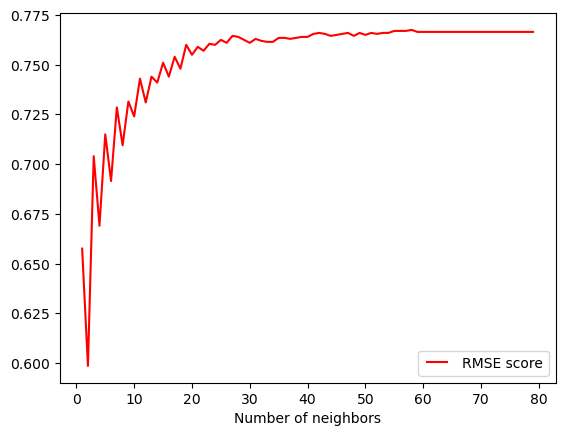

In [1029]:
from sklearn.neighbors  import KNeighborsClassifier

ACC = []
neighbors = range(1,80)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(features_train, target_train)
    y_pred = knn.predict(features_train)
    ACC.append(knn.score(features_test, target_test))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(neighbors, ACC, 'r', label='RMSE score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.xlabel('Number of neighbors')
plt.show()

In [1033]:
print('Higher ACC is ', max(ACC))
print('Higher ACC is for k =', ACC.index(max(ACC))+1)

Higher ACC is  0.7675
Higher ACC is for k = 58


In [1597]:
# Воспользуемся методом ближайших соседей
knn = KNeighborsClassifier(n_neighbors = 30,           # число соседей
                           metric      = "minkowski", # метрика расстояния
                           p           = 2)           # Евклидова метрика
knn.fit(features_train, target_train)                        # обучение на данных

KNeighborsClassifier(n_neighbors=30)

In [1039]:
# Оцениваем вероятности
prob_knn = knn.predict_proba(features_train)
print(prob_knn[0:10:, 0])                             # оценки P(Y = 0 | X = x)
print(prob_knn[0:10:, 1])                             # оценки P(Y = 1 | X = x)

# Прогнозы
prediction_knn = knn.predict(features_train)          # I(P(Y = 1 | X = x) > 0.5)
print(prediction_knn[0:10])

[0.43333333 0.26666667 0.36666667 0.16666667 0.36666667 0.43333333
 0.23333333 0.23333333 0.96666667 0.33333333]
[0.56666667 0.73333333 0.63333333 0.83333333 0.63333333 0.56666667
 0.76666667 0.76666667 0.03333333 0.66666667]
[1 1 1 1 1 1 1 1 0 1]


In [1041]:
# Оценим точность
ACC_knn_train = knn.score(features_train, target_train)  # обучающая выборка
ACC_knn_test  = knn.score(features_test, target_test)    # тестовая выборка

# Посмотрим на результат
print(pd.DataFrame(data    = [ACC_knn_train, ACC_knn_test],
                   index   = ['Обучающая выборка', 'Тестовая выборка'],
                   columns = ['ACC']))

# Гиперпараметры модели
knn.get_params()

                     ACC
Обучающая выборка  0.769
Тестовая выборка   0.761


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 30,
 'p': 2,
 'weights': 'uniform'}

In [1043]:
# Перебираемые значения гиперпараметров
hyperparameters = {'n_neighbors': [7, 10, 14, 30, 32], 'p': [1, 2, 3]}

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_knn = GridSearchCV(estimator  = knn,              # модель
                        param_grid = hyperparameters,  # перебираемые гиперпараметры
                        scoring    = "accuracy",       # метрика качества модели
                        cv         = 5)                # число фолдов в кросс-валидации
GSCV_knn.fit(features_train, target_train)             # подбор гиперпараметров
                                                       # на конкретных данных

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': [7, 10, 14, 30, 32], 'p': [1, 2, 3]},
             scoring='accuracy')

In [1044]:
# Достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_best = GSCV_knn.best_params_
print(hyperparameters_best)

# Обучим модель с лучшими гиперпараметрами
knn2 = KNeighborsClassifier(n_neighbors = hyperparameters_best["n_neighbors"],
                            metric      = "minkowski",
                            p           = hyperparameters_best["p"])
knn2.fit(features_train, target_train)

{'n_neighbors': 32, 'p': 2}


KNeighborsClassifier(n_neighbors=32)

In [1299]:
# Оценим точность модели с подобранными гиперпараметрами
ACC_knn2_train = knn2.score(features_train, target_train)  # обучающая выборка
ACC_knn2_test  = knn2.score(features_test, target_test)    # тестовая выборка

# Сравним точность с исходными и подобранными гиперпараметрами
print(pd.DataFrame(data    = [ACC_knn_test, ACC_knn2_test],
                   index   = ['Исходные гиперпараметры',
                              'Подобранные гиперпараметры'],
                   columns = ['ACC тестовой выборки']))

                            ACC тестовой выборки
Исходные гиперпараметры                    0.761
Подобранные гиперпараметры                 0.762


In [1300]:
# Сравним результаты кросс-валидации (чем больше, тем лучше)
ACC_CV_knn  = np.mean(cross_val_score(knn, features_train, target_train, cv = 5))
ACC_CV_knn2 = np.mean(cross_val_score(knn2, features_train, target_train, cv = 5))
print(pd.DataFrame(data    = [ACC_CV_knn, ACC_CV_knn2],
                   index   = ['k-ближайших соседей 1', 'k-ближайших соседей 2'],
                   columns = ['ACC-CV']))

                         ACC-CV
k-ближайших соседей 1  0.764750
k-ближайших соседей 2  0.765625


In [1303]:
print(pd.DataFrame(data    = [ACC_knn_train,
                              ACC_knn_test,
                              ACC_knn2_train,
                              ACC_knn2_test,
                              ACC_CV_knn, ACC_CV_knn2],
                   index   = ['k-ближайших соседей 1 (train)',
                              'k-ближайших соседей 1 (test)',
                              'k-ближайших соседей 2 (train)',
                              'k-ближайших соседей 2 (test)',
                              'k-ближайших соседей 1 (cv)',
                              'k-ближайших соседей 2 (cv)'],
                   columns = ['ACC']))

                                    ACC
k-ближайших соседей 1 (train)  0.769000
k-ближайших соседей 1 (test)   0.761000
k-ближайших соседей 2 (train)  0.768250
k-ближайших соседей 2 (test)   0.762000
k-ближайших соседей 1 (cv)     0.764750
k-ближайших соседей 2 (cv)     0.765625


## Наивный байесовский классификатор

In [1305]:
from sklearn.naive_bayes import GaussianNB

In [1307]:
nb = GaussianNB()
nb.fit(x1_train, y1_train)

GaussianNB()

In [1309]:
# Оценим условные вероятности
prob_nb = nb.predict_proba(x1_train)
print(prob_nb[0:10:, 0])                   # оценки P(Y = 0 | X = x)
print(prob_nb[0:10:, 1])                   # оценки P(Y = 1 | X = x)

[0.1474659  0.13133541 0.151838   0.0862235  0.06791797 0.14128325
 0.11640373 0.12177314 1.         0.13724501]
[8.52534097e-01 8.68664589e-01 8.48161997e-01 9.13776503e-01
 9.32082028e-01 8.58716745e-01 8.83596271e-01 8.78226864e-01
 1.00324591e-12 8.62754989e-01]


In [1311]:
# Прогнозы
prediction_nb = nb.predict(x1_train)       # I(P(Y = 1 | X = x) >= 0.5)
print(prediction_nb[0:10])

[1 1 1 1 1 1 1 1 0 1]


In [1313]:
# Оценим точность наивного Байесовского
# класификатора внутривыборочно
ACC_nb_train = np.mean(target_train == prediction_nb) # вручную как долю случаев, когда
                                          # значение целевой переменной совпало
                                          # с прогнозом
ACC_nb_train = nb.score(x1_train, target_train)       # автоматически

print(ACC_nb_train)

0.767625


In [1315]:
# Оценим точность прогноза на тестовой выбокре
ACC_nb_test = nb.score(x1_test, y1_test)

In [1317]:
# Сравним точность прогноза на обучающей и тестовой выборках
ACC_nb_train = nb.score(x1_train, y1_train)
print(pd.DataFrame(data    = [ACC_nb_train, ACC_nb_test],
                   index   = ['Обучающая выборка',
                              'Тестовая выборка'],
                   columns = ['ACC']))

                        ACC
Обучающая выборка  0.767625
Тестовая выборка   0.767000


In [1319]:
# тюнинг гиперпараметров
hyperparameters_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

# перебор гиперпараметров с помощью кросс-валидации
GSCV_nb = GridSearchCV(estimator=nb,
                     param_grid=hyperparameters_nb,
                     scoring='accuracy',
                     cv=5)
GSCV_nb.fit(x1_train, y1_train)

# достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_best_nb = GSCV_nb.best_params_
print(hyperparameters_best_nb)

{'var_smoothing': 1.873817422860383e-05}


In [1321]:
# обучим модель с лучшими гиперпараметрами
nb2 = GaussianNB(var_smoothing = hyperparameters_best_nb['var_smoothing'])

nb2.fit(x1_train, y1_train)

GaussianNB(var_smoothing=1.873817422860383e-05)

In [1323]:
# Оценим точность модели с подобранными гиперпараметрами
ACC_nb2_train = nb2.score(x1_train, y1_train)  # обучающая выборка
ACC_nb2_test  = nb2.score(x1_test, y1_test)    # тестовая выборка

# Сравним точность с исходными и подобранными гиперпараметрами
print(pd.DataFrame(data    = [ACC_nb_test, ACC_nb2_test],
                   index   = ['Исходные гиперпараметры',
                              'Подобранные гиперпараметры'],
                   columns = ['ACC тестовой выборки']))

                            ACC тестовой выборки
Исходные гиперпараметры                    0.767
Подобранные гиперпараметры                 0.767


In [1325]:
# Сравним результаты кросс-валидации (чем больше, тем лучше)
ACC_CV_nb  = np.mean(cross_val_score(nb, features_train, target_train, cv = 5))
ACC_CV_nb2 = np.mean(cross_val_score(nb2, features_train, target_train, cv = 5))
print(pd.DataFrame(data    = [ACC_CV_nb, ACC_CV_nb2],
                   index   = ['Наивный байесовский классификатор 1', 'Наивный байесовский классификатор 2'],
                   columns = ['ACC-CV']))

                                       ACC-CV
Наивный байесовский классификатор 1  0.767625
Наивный байесовский классификатор 2  0.767625


In [1327]:
print(pd.DataFrame(data    = [ACC_nb_train,
                              ACC_nb_test,
                              ACC_nb2_train,
                              ACC_nb2_test,
                              ACC_CV_nb, ACC_CV_nb2],
                   index   = ['Наивный байесовский классификатор 1 (train)',
                              'Наивный байесовский классификатор 1 (test)',
                              'Наивный байесовский классификатор 2 (train)',
                              'Наивный байесовский классификатор 2 (test)',
                              'Наивный байесовский классификатор 1 (cv)',
                              'Наивный байесовский классификатор 2 (cv)'],
                   columns = ['ACC']))

                                                  ACC
Наивный байесовский классификатор 1 (train)  0.767625
Наивный байесовский классификатор 1 (test)   0.767000
Наивный байесовский классификатор 2 (train)  0.767625
Наивный байесовский классификатор 2 (test)   0.767000
Наивный байесовский классификатор 1 (cv)     0.767625
Наивный байесовский классификатор 2 (cv)     0.767625


## Деревья: DecisionTree

In [1329]:
from sklearn import tree

In [1331]:
# Обучим решающее дерево с произвольными параметрами
dt = tree.DecisionTreeClassifier(max_depth = 3, criterion = 'entropy')
dt.fit(x1_train, y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

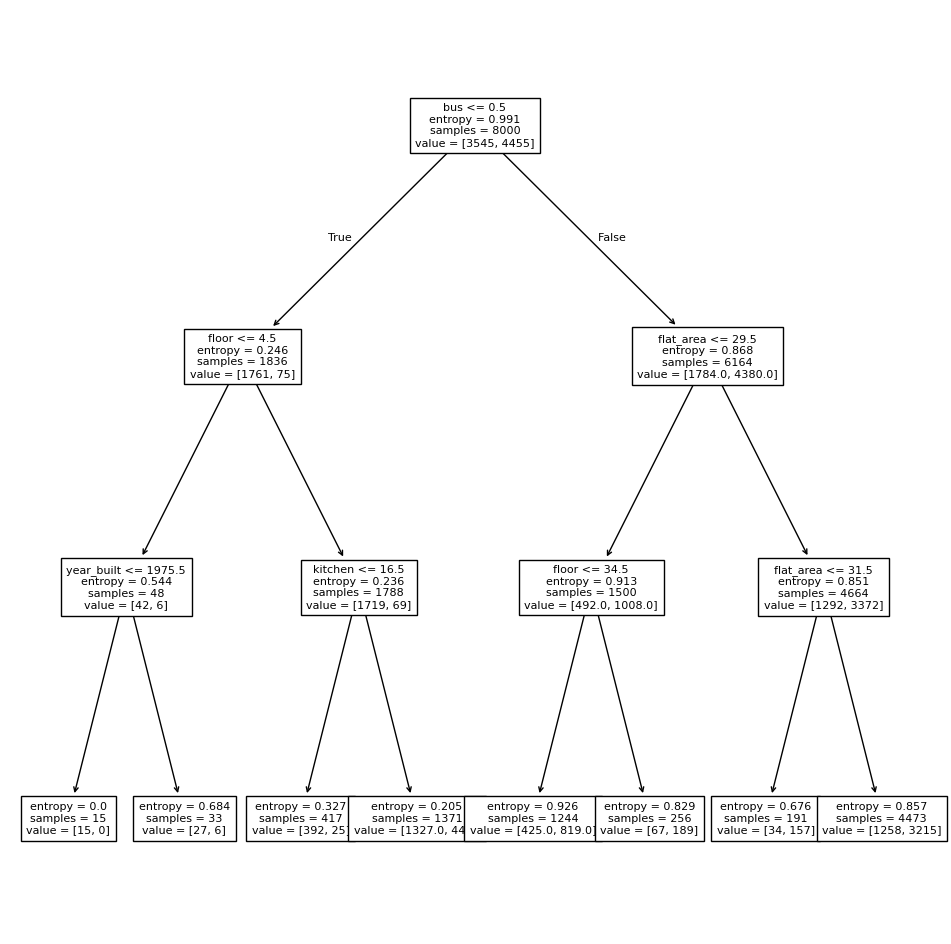

In [1333]:
# Визуализируем полученный результат
plt.figure(figsize=(12, 12))
tree.plot_tree(dt, feature_names = x1_train.columns, fontsize = 8)
plt.show()

In [1335]:
# Оцениваем условные вероятности
prob_dt = dt.predict_proba(x1_train)
print(prob_dt[0:10:, 0])                   # оценки P(Y = 0 | X = x)
print(prob_dt[0:10:, 1])                   # оценки P(Y = 1 | X = x)

[0.34163987 0.34163987 0.28124301 0.26171875 0.28124301 0.17801047
 0.34163987 0.28124301 0.96790664 0.28124301]
[0.65836013 0.65836013 0.71875699 0.73828125 0.71875699 0.82198953
 0.65836013 0.71875699 0.03209336 0.71875699]


In [1337]:
# Прогнозы
prediction_dt = dt.predict(x1_train)       # I(P(Y = 1 | X = x) > 0.5)

In [1339]:
# Оценим точность на обучающей выборке
ACC_train_dt = dt.score(x1_train, y1_train)
print(ACC_train_dt)

0.767625


In [1341]:
# Оценим точность на тестовой выборке
ACC_test_dt = dt.score(x1_test, y1_test)
print(ACC_test_dt)

0.767


In [1343]:
# Посмотрим на результат
print(pd.DataFrame(data    = [ACC_train_dt, ACC_test_dt],
                   index   = ['Обучающая выборка', 'Тестовая выборка'],
                   columns = ['ACC']))

                        ACC
Обучающая выборка  0.767625
Тестовая выборка   0.767000


In [1345]:
# подбор оптимальной глубины решающего дерева, чтобы избежать переобучения
# Перебираемые значения гиперпараметров
hyperparameters = {'max_depth': range(1, 20)}

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_dt = GridSearchCV(estimator  = dt,                # модель
                       param_grid = hyperparameters,   # перебираемые гиперпараметры
                       scoring    = "accuracy",        # метрика качества модели
                       cv         = 5)                 # число фолдов в кросс-валидации
GSCV_dt.fit(x1_train, y1_train)              # подбор гиперпараметров
                                                       # на конкретных данных

# Достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_dt = GSCV_dt.best_params_

# Посмотрим на оптимальную глубину дерева
print(hyperparameters_dt)

{'max_depth': 1}


In [1347]:
# Обучим модель с лучшими гиперпараметрами
dt2 = tree.DecisionTreeClassifier(max_depth = hyperparameters_dt['max_depth'], criterion = 'entropy')
dt2.fit(x1_train, y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [1349]:
# Оценим точность модели с подобранными гиперпараметрами
ACC_dt2_train = dt2.score(x1_train, y1_train)  # обучающая выборка
ACC_dt2_test  = dt2.score(x1_test, y1_test)    # тестовая выборка

In [1351]:
# Сравним точность с исходными и подобранными гиперпараметрами
print(pd.DataFrame(data    = [ACC_test_dt, ACC_dt2_test],
                   index   = ['Исходные гиперпараметры',
                              'Подобранные гиперпараметры'],
                   columns = ['ACC тестовой выборки']))

                            ACC тестовой выборки
Исходные гиперпараметры                    0.767
Подобранные гиперпараметры                 0.767


In [1353]:
# Сравним результаты кросс-валидации (чем больше, тем лучше)
ACC_CV_dt  = np.mean(cross_val_score(dt, x1_train, y1_train, cv = 5))
ACC_CV_dt2 = np.mean(cross_val_score(dt2, x1_train, y1_train, cv = 5))
print(pd.DataFrame(data    = [ACC_CV_dt, ACC_CV_dt2],
                   index   = ['Дерево решений 1', 'Дерево решений 2'],
                   columns = ['ACC-CV']))

                    ACC-CV
Дерево решений 1  0.767375
Дерево решений 2  0.767625


In [1355]:
print(pd.DataFrame(data    = [ACC_train_dt,
                              ACC_test_dt,
                              ACC_dt2_train,
                              ACC_dt2_test,
                              ACC_CV_dt, ACC_CV_dt2],
                   index   = ['Дерево решений 1 (train)',
                              'Дерево решений 1 (test)',
                              'Дерево решений 2 (train)',
                              'Дерево решений 2 (test)',
                              'Дерево решений 1 (cv)',
                              'Дерево решений 2 (cv)'],
                   columns = ['ACC']))

                               ACC
Дерево решений 1 (train)  0.767625
Дерево решений 1 (test)   0.767000
Дерево решений 2 (train)  0.767625
Дерево решений 2 (test)   0.767000
Дерево решений 1 (cv)     0.767375
Дерево решений 2 (cv)     0.767625


## Деревья: RandomForest

In [1357]:
from sklearn.ensemble import RandomForestClassifier

In [1359]:
# Обучим случайный лес с произвольными параметрами
rf = RandomForestClassifier(max_depth    = 12,         # максимальная глубина деревьев
                            max_features = "sqrt",     # число случайно выбираемых при
                                                       # каждом разбиении признаков
                            max_samples  = 500,        # число бутстрап итераций
                            random_state = 777,        # для вопроизводимости
                            criterion    = 'entropy')  # критерий выбора признаков
                                                       # при разбиении узлов
rf.fit(x1_train, y1_train)

RandomForestClassifier(criterion='entropy', max_depth=12, max_samples=500,
                       random_state=777)

In [1361]:
# Оценим условные вероятности
prob_rf = rf.predict_proba(x1_train)
print(prob_rf[0:10:, 0])                            # оценки P(Y = 0 | X = x)
print(prob_rf[0:10:, 1])                            # оценки P(Y = 1 | X = x)

[0.29798379 0.34037647 0.44056278 0.2670523  0.34901295 0.30487898
 0.33935637 0.29014635 0.92088165 0.33272119]
[0.70201621 0.65962353 0.55943722 0.7329477  0.65098705 0.69512102
 0.66064363 0.70985365 0.07911835 0.66727881]


In [1363]:
# Прогнозы
prediction_rf = rf.predict(x1_train)          # I(P(Y = 1 | X = x) > 0.5)

In [1365]:
ACC_rf_train = rf.score(x1_train, y1_train)
print(ACC_rf_train)

0.768


In [1367]:
ACC_rf_test = rf.score(x1_test, y1_test)
print(ACC_rf_test)

0.767


In [884]:
# подбор гиперпараметров
# перебираемые значения гиперпараметров
grid_space={'max_depth': [3,5,7,10,15],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7,9],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[2,3]
           }

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_rf = GridSearchCV(estimator  = rf,           # модель
                       param_grid = grid_space,   # перебираемые гиперпараметры
                       scoring    = "accuracy",   # метрика качества модели
                       cv         = 5)            # число фолдов в кросс-валидации
model_GSCV_rf = GSCV_rf.fit(x1_train, y1_train)   # подбор гиперпараметров
                                                  # на конкретных данных

# Достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_rf = GSCV_rf.best_params_

In [ ]:
print('Best hyperparameters are: '+str(model_GSCV_rf.best_params_))
print('Best score is: '+str(model_GSCV_rf.best_score_))

In [964]:
# Обучим модель с лучшими гиперпараметрами
rf2 = RandomForestClassifier(max_depth = hyperparameters_rf['max_depth'],
                             max_features = hyperparameters_rf['max_features'],
                             max_samples  = 500,
                             random_state = 777,
                             criterion    = 'entropy',
                             min_samples_leaf = hyperparameters_rf['min_samples_leaf'],
                             min_samples_split = hyperparameters_rf['min_samples_split'],
                             n_estimators = hyperparameters_rf['n_estimators'])

rf2.fit(x1_train, y1_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=9,
                       max_samples=500, min_samples_split=3, n_estimators=10,
                       random_state=777)

In [1369]:
# Обучим модель с лучшими гиперпараметрами
rf2 = RandomForestClassifier(max_depth = 5,
                             max_features = 9,
                             max_samples  = 500,
                             random_state = 777,
                             criterion    = 'entropy',
                             min_samples_leaf = 1,
                             min_samples_split = 3,
                             n_estimators = 10)

rf2.fit(x1_train, y1_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=9,
                       max_samples=500, min_samples_split=3, n_estimators=10,
                       random_state=777)

In [1371]:
# Оценим точность модели с подобранными гиперпараметрами
ACC_rf2_train = rf2.score(x1_train, y1_train)  # обучающая выборка
ACC_rf2_test  = rf2.score(x1_test, y1_test)    # тестовая выборка

In [1373]:
# Сравним точность с исходными и подобранными гиперпараметрами
print(pd.DataFrame(data    = [ACC_rf_test, ACC_rf2_test],
                   index   = ['Исходные гиперпараметры',
                              'Подобранные гиперпараметры'],
                   columns = ['ACC тестовой выборки']))

                            ACC тестовой выборки
Исходные гиперпараметры                   0.7670
Подобранные гиперпараметры                0.7675


In [1375]:
# Сравним результаты кросс-валидации (чем больше, тем лучше)
ACC_CV_rf  = np.mean(cross_val_score(rf, x1_train, y1_train, cv = 5))
ACC_CV_rf2 = np.mean(cross_val_score(rf2, x1_train, y1_train, cv = 5))
print(pd.DataFrame(data    = [ACC_CV_rf, ACC_CV_rf2],
                   index   = ['Случайный лес 1', 'Случайный лес 2'],
                   columns = ['ACC-CV']))

                   ACC-CV
Случайный лес 1  0.767500
Случайный лес 2  0.768375


In [1377]:
print(pd.DataFrame(data    = [ACC_rf_train,
                              ACC_rf_test,
                              ACC_rf2_train,
                              ACC_rf2_test,
                              ACC_CV_rf, ACC_CV_rf2],
                   index   = ['Случайный лес 1 (train)',
                              'Случайный лес 1 (test)',
                              'Случайный лес 2 (train)',
                              'Случайный лес 2 (test)',
                              'Случайный лес 1 (cv)',
                              'Случайный лес 2 (cv)'],
                   columns = ['ACC']))

                              ACC
Случайный лес 1 (train)  0.768000
Случайный лес 1 (test)   0.767000
Случайный лес 2 (train)  0.767625
Случайный лес 2 (test)   0.767500
Случайный лес 1 (cv)     0.767500
Случайный лес 2 (cv)     0.768375


### Ошибка неотобранных элементов (out-of-bag errors)

In [1379]:
# Ошибка неотобранных элементов (OOB error)
rf.oob_score = True               # укажем необходимость подсчета OOB
rf.fit(x1_train, y1_train)        # обучим модель рассчитав OOB
oob_rf = 1 - rf.oob_score_        # значение OOB

In [1381]:
oob_rf

0.23275

In [1383]:
rf2.oob_score = True
rf2.fit(x1_train, y1_train)
oob_rf2 = 1 - rf2.oob_score_
oob_rf2

0.23362499999999997

In [1385]:
# Сравним OOB моделей (чем меньше, тем лучше)
print(pd.DataFrame(data    = [oob_rf, oob_rf2],
                   index   = ['Случайный лес 1', 'Случайный лес 2'],
                   columns = ['OOB']))

                      OOB
Случайный лес 1  0.232750
Случайный лес 2  0.233625


для классификатора с подобранными гиперпараметрами ошибка OOB меньше

In [1387]:
# Сравним результаты кросс-валидации (чем больше, тем лучше)
ACC_CV_rf  = np.mean(cross_val_score(rf, x1_train, y1_train, cv = 5))
ACC_CV_rf2 = np.mean(cross_val_score(rf2, x1_train, y1_train, cv = 5))
print(pd.DataFrame(data    = [ACC_CV_rf, ACC_CV_rf2],
                   index   = ['Случайный лес 1', 'Случайный лес 2'],
                   columns = ['ACC-CV']))

                   ACC-CV
Случайный лес 1  0.767500
Случайный лес 2  0.768375


с подобранными гиперпараметрами снова лучше

**Преимущество OOB ошибки** - обычно быстрее, чем кросс-валидация, поскольку не нужно многократно обучать модель.

**Недостаток OOB ошибки** - нельзя использовать за пределами ансамблевых методов, что осложняет сопоставление их результатов с неансамблевыми методами.

### Расчет важности признаков

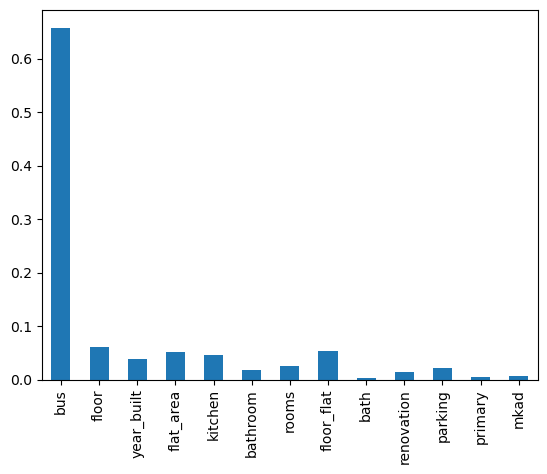

In [1388]:
# Рассмотрим важность признаков на основании снижения неопределенности
importances = pd.Series(rf2.feature_importances_, index = x1.columns)
importances.plot.bar()
plt.show()

In [1391]:
from sklearn.inspection import permutation_importance

In [1393]:
# Рассмотрим важность регрессоров на основании перестановок
importances2 = permutation_importance(estimator = rf2,
                                      X = x1,
                                      y = y1,
                                      scoring = "accuracy")
importances2 = pd.Series(importances2["importances_mean"],
                         index = x1.columns)
print(importances2)

bus           0.23838
floor         0.00078
year_built    0.00030
flat_area     0.00012
kitchen       0.00008
bathroom      0.00008
rooms         0.00038
floor_flat    0.00048
bath         -0.00012
renovation   -0.00006
parking       0.00024
primary       0.00024
mkad          0.00022
dtype: float64


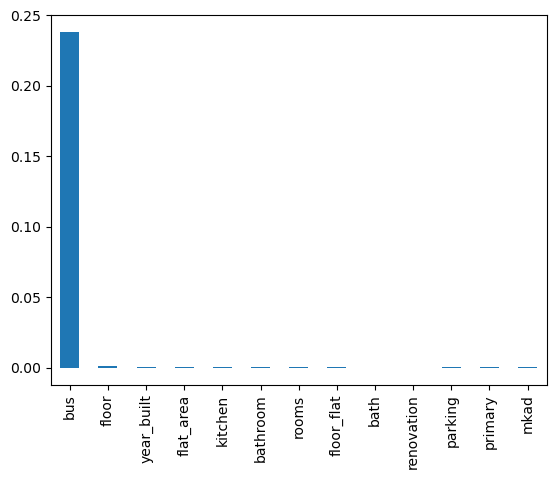

In [1395]:
importances2.plot.bar()
plt.show()

In [1397]:
# Для удобства отсортируем признаки в порядке важности
importances = importances.sort_values(ascending = False)
print(importances)

bus           0.658057
floor         0.060137
floor_flat    0.052608
flat_area     0.050740
kitchen       0.045923
year_built    0.038418
rooms         0.025739
parking       0.021602
bathroom      0.018019
renovation    0.013286
mkad          0.006507
primary       0.005399
bath          0.003565
dtype: float64


In [1399]:
# Обучим случайный лес с тремя наиболее важными признаками
rf3 = deepcopy(rf)
n_important = 3
rf3.fit(x1_train.loc[:, importances.index[range(0, 3)]], y1_train)

RandomForestClassifier(criterion='entropy', max_depth=12, max_samples=500,
                       oob_score=True, random_state=777)

In [1401]:
# Обучим случайный лес с пятью наиболее важными признаками
rf5 = deepcopy(rf)
n_important = 5
rf5.fit(x1_train.loc[:, importances.index[range(0, 5)]], y1_train)

RandomForestClassifier(criterion='entropy', max_depth=12, max_samples=500,
                       oob_score=True, random_state=777)

In [1403]:
# Сравним результаты на тестовой выборке
ACC_test_rf  = rf.score(x1_test, y1_test)
ACC_test_rf_best = rf2.score(x1_test, y1_test)
ACC_test_rf3 = rf3.score(x1_test.loc[:, importances.index[range(0, 3)]],
                         y1_test)
ACC_test_rf5 = rf5.score(x1_test.loc[:, importances.index[range(0, 5)]],
                         y1_test)
print(pd.DataFrame(data    = [ACC_test_rf, ACC_test_rf_best, ACC_test_rf3, ACC_test_rf5],
                   index   = ['Случайный лес 1',
                              'Случайный лес 2',
                              'Случайный лес 3',
                              'Случайный лес 4'],
                   columns = ['ACC тест']))

                 ACC тест
Случайный лес 1    0.7670
Случайный лес 2    0.7675
Случайный лес 3    0.7670
Случайный лес 4    0.7670


лучший rf с подобранными гиперпараметрами по гридсерчу

### Ансамбли

In [1405]:
from sklearn.ensemble import BaggingClassifier

In [1407]:
# Создадим ансамбль используя бэггинг, взяв за основу случайный лес
rf = RandomForestClassifier(max_depth = 15,
                              max_features = 9,
                              max_samples = 500,
                              random_state = 777,
                              criterion = 'entropy',
                              min_samples_leaf = 3,
                              min_samples_split = 2,
                              n_estimators = 100)
rf_b = BaggingClassifier(estimator = rf,
                          n_estimators = 100,
                          max_features = int(np.sqrt(x1_train.shape[1])),
                          oob_score    = True)
rf_b.fit(x1_train, y1_train)

BaggingClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                   max_depth=15, max_features=9,
                                                   max_samples=500,
                                                   min_samples_leaf=3,
                                                   random_state=777),
                  max_features=3, n_estimators=100, oob_score=True)

In [ ]:
# Сравним результаты со случайным лесом с помощью кросс-валидации
ACC_CV_rf_b = np.mean(cross_val_score(rf_b, x1_train,
                                       y1_train, cv = 5))
print(pd.DataFrame(data    = [ACC_CV_rf, ACC_CV_rf_b],
                   index   = ['Случайный лес', 'Случайные лес bagging'],
                   columns = ['ACC-CV']))

In [1413]:
# Сопоставим результаты со случайным лесом с помощью OOB ошибки
oob_rf_b = 1 - rf_b.oob_score_
print(pd.DataFrame(data    = [oob_rf, oob_rf_b],
                   index   = ['Случайный лес', 'Случайные лес bagging'],
                   columns = ['OOB']))

                            OOB
Случайный лес          0.232750
Случайные лес bagging  0.261375


In [1415]:
# Создадим ансамбль используя бэггинг, взяв за основу метод ближайших соседей
knn   = KNeighborsClassifier(n_neighbors = 3)
knn_b = BaggingClassifier(estimator    = knn,
                          n_estimators = 100,
                          max_features = int(np.sqrt(x1_train.shape[1])),
                          oob_score    = True)
knn_b.fit(x1_train, y1_train)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3), max_features=3,
                  n_estimators=100, oob_score=True)

In [1417]:
# Сравним результаты со случайным лесом с помощью кросс-валидации
ACC_CV_knn_b = np.mean(cross_val_score(knn_b, x1_train,
                                       y1_train, cv = 5))
print(pd.DataFrame(data    = [ACC_CV_rf, ACC_CV_knn_b],
                   index   = ['Случайный лес', 'Случайные соседи'],
                   columns = ['ACC-CV']))

                    ACC-CV
Случайный лес     0.767500
Случайные соседи  0.725125


In [1419]:
# Сопоставим результаты со случайным лесом с помощью OOB ошибки
oob_knn_b = 1 - knn_b.oob_score_
print(pd.DataFrame(data    = [oob_rf, oob_knn_b],
                   index   = ['Случайный лес', 'Случайные соседи'],
                   columns = ['OOB']))

                      OOB
Случайный лес     0.23275
Случайные соседи  0.28850


## Логистическая регрессия

In [1426]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [1428]:
# Обучим логистическую регрессию
logit = LogisticRegression(penalty = None, solver = 'lbfgs',
                           fit_intercept = True)
logit.fit(features_train, target_train)

LogisticRegression(penalty=None)

In [1430]:
# Оценки коэффициентов (без константы)
coef = pd.Series(logit.coef_[-0], index = features_train.columns)
print(coef)

# Константа
intercept = logit.intercept_
print(intercept)

bus           1.701400
floor         0.019440
year_built   -0.005864
flat_area     0.034873
kitchen      -0.015175
bathroom     -0.026344
rooms         0.047552
floor_flat    0.032026
bath          0.051393
renovation   -0.008903
parking       0.023117
primary       0.040556
mkad          0.000079
dtype: float64
[-0.03161993]


In [1432]:
# Оценки условных вероятностей
prob_logit = logit.predict_proba(features_train)[:, 1]
print(prob_logit[0:10])

[0.67397977 0.71312899 0.65399747 0.72632933 0.72540417 0.68782933
 0.71591987 0.70724254 0.03418403 0.72825533]


In [1434]:
# Прогнозы
prediction_logit = logit.predict(features_train)
print(prediction_logit[0:10])

[1 1 1 1 1 1 1 1 0 1]


In [1436]:
# Точность на обучающей выборке
ACC_train_logit = logit.score(features_train, target_train)
print(ACC_train_logit)

0.767625


In [1438]:
# Точность на тестовой выборке
ACC_test_logit = logit.score(features_test, target_test)
print(ACC_test_logit)

0.767


In [1440]:
# Сравним точность на обучающей и тестовой выборке
print(pd.DataFrame(data    = [ACC_train_logit, ACC_test_logit],
                   index   = ['Обучающая выборка',
                              'Тестовая выборка'],
                   columns = ['ACC']))

                        ACC
Обучающая выборка  0.767625
Тестовая выборка   0.767000


In [1442]:
# Перебираемые значения гиперпараметров
hyperparameters = {'C': np.logspace(-4,4,20),
                   'max_iter'  : [100,500,1000]}

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_logit = GridSearchCV(estimator  = logit,            # модель
                          param_grid = hyperparameters,  # перебираемые гиперпараметры
                          scoring    = "accuracy",       # метрика качества модели
                          cv         = 5)                # число фолдов в кросс-валидации
GSCV_logit.fit(features_train, target_train)                       # подбор гиперпараметров
                                                         # на конкретных данных

# Достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_logit = GSCV_logit.best_params_
print(hyperparameters_logit)

C:\Users\annaz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annaz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annaz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annaz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annaz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annaz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None wil

{'C': 0.0001, 'max_iter': 100}


C:\Users\annaz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annaz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annaz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annaz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annaz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\annaz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None wil

In [1444]:
print('Best hyperparameters are: '+str(GSCV_logit.best_params_))
print('Best score is: '+str(round(GSCV_logit.best_score_, 4)))

Best hyperparameters are: {'C': 0.0001, 'max_iter': 100}
Best score is: 0.7676


In [1446]:
# Обучим модель с лучшими гиперпараметрами
logit2 = LogisticRegression(penalty = 'l2',
                            solver = 'lbfgs',
                            C = hyperparameters_logit['C'],
                            max_iter = hyperparameters_logit['max_iter'])

logit2.fit(features_train, target_train)

LogisticRegression(C=0.0001)

In [1448]:
# Оценим точность модели с подобранными гиперпараметрами
ACC_logit2_train = logit2.score(features_train, target_train)  # обучающая выборка
ACC_logit2_test  = logit2.score(features_test, target_test)    # тестовая выборка

In [1450]:
# Сравним точность с исходными и подобранными гиперпараметрами
print(pd.DataFrame(data    = [ACC_test_logit, ACC_logit2_test],
                   index   = ['Исходные гиперпараметры',
                              'Подобранные гиперпараметры'],
                   columns = ['ACC тестовой выборки']))

                            ACC тестовой выборки
Исходные гиперпараметры                    0.767
Подобранные гиперпараметры                 0.767


In [1452]:
# Сравним результаты кросс-валидации (чем больше, тем лучше)
ACC_CV_logit  = np.mean(cross_val_score(logit, features_train, target_train, cv = 5))
ACC_CV_logit2 = np.mean(cross_val_score(logit2, features_train, target_train, cv = 5))
print(pd.DataFrame(data    = [ACC_CV_logit, ACC_CV_logit2],
                   index   = ['Логистическая регрессия 1', 'Логистическая регрессия 2'],
                   columns = ['ACC-CV']))

                             ACC-CV
Логистическая регрессия 1  0.767625
Логистическая регрессия 2  0.765625


In [1454]:
print(pd.DataFrame(data    = [ACC_train_logit,
                              ACC_test_logit,
                              ACC_logit2_train,
                              ACC_logit2_test,
                              ACC_CV_logit, ACC_CV_logit2],
                   index   = ['Логистическая регрессия 1 (train)',
                              'Логистическая регрессия 1 (test)',
                              'Логистическая регрессия 2 (train)',
                              'Логистическая регрессия 2 (test)',
                              'Логистическая регрессия 1 (cv)',
                              'Логистическая регрессия 2 (cv)'],
                   columns = ['ACC']))

                                        ACC
Логистическая регрессия 1 (train)  0.767625
Логистическая регрессия 1 (test)   0.767000
Логистическая регрессия 2 (train)  0.767625
Логистическая регрессия 2 (test)   0.767000
Логистическая регрессия 1 (cv)     0.767625
Логистическая регрессия 2 (cv)     0.765625


## Градиентный бустинг

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [1460]:
# Воспользуемся градиентным бустингом с произвольными параметрами
gb = GradientBoostingClassifier(loss = "log_loss",             # функция потерь
                                n_estimators = 50,             # число деревьев
                                learning_rate = 0.5,           # скорость обучения
                                criterion = "friedman_mse",    # критерий деревьев
                                max_depth = 2,                 # глубина деревьев
                                random_state = 123,            # для воспроизводимости
                                max_features = None)           # признаки
gb.fit(x1_train, y1_train)                                     # обучение

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, n_estimators=50,
                           random_state=123)

In [1462]:
# Оценим условные вероятности градиентным бустингом
gb_train = gb.predict_proba(x1_train)[:, 1]
gb_test  = gb.predict_proba(x1_test)[:, 1]

In [1464]:
# Точность на обучающей выборке
ACC_gb_train = gb.score(x1_train, y1_train)

In [1466]:
# Точность на тестовой выборке
ACC_gb_test = gb.score(x1_test, y1_test)
print(pd.DataFrame(data    = [ACC_test_logit, ACC_gb_test],
                   index   = ['Логит', 'Градиентный бустинг'],
                   columns = ['ACC тест']))

                     ACC тест
Логит                   0.767
Градиентный бустинг     0.764


In [1468]:
# Сравним точность на обучающей и тестовой выборках
print(pd.DataFrame(data    = [ACC_gb_train, ACC_gb_test],
                   index   = ['Обучающая выборка', 'Тестовая выборка'],
                   columns = ['ACC']))

                       ACC
Обучающая выборка  0.77225
Тестовая выборка   0.76400


In [893]:
# Перебираемые значения гиперпараметров
hyperparameters = {
    "learning_rate": [0.1, 0.3, 0.5],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 3],
    "max_depth":[2, 3, 4],
    "max_features":["sqrt", None],
    "subsample":[0.5, 0.75]
    }

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_gb = GridSearchCV(estimator  = gb,              # модель
                        param_grid = hyperparameters,  # перебираемые гиперпараметры
                        scoring    = "accuracy",       # метрика качества модели
                        cv         = 5)                # число фолдов в кросс-валидации
GSCV_gb.fit(x1_train, y1_train)             # подбор гиперпараметров
                                                       # на конкретных данных

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=2,
                                                  min_samples_leaf=3,
                                                  subsample=0.75),
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [2, 3, 4], 'max_features': ['sqrt', None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'subsample': [0.5, 0.75]},
             scoring='accuracy')

In [1470]:
# Достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_gb = GSCV_gb.best_params_
print(hyperparameters_gb)

{'learning_rate': 0.1, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'subsample': 0.5}


In [1472]:
# Обучим модель с подобранными гиперпараметрами
gb2 = GradientBoostingClassifier(loss = "log_loss",
                                n_estimators = 50,
                                learning_rate = hyperparameters_gb['learning_rate'],
                                criterion = 'friedman_mse',
                                max_depth = hyperparameters_gb['max_depth'],
                                random_state = 123,
                                max_features = hyperparameters_gb['max_features'],
                                min_samples_split = hyperparameters_gb['min_samples_split'],
                                min_samples_leaf = hyperparameters_gb['min_samples_leaf'],
                                subsample = hyperparameters_gb['subsample'])

gb2.fit(x1_train, y1_train)

GradientBoostingClassifier(max_depth=2, max_features='sqrt',
                           min_samples_split=6, n_estimators=50,
                           random_state=123, subsample=0.5)

In [1474]:
# Оценим точность модели с подобранными гиперпараметрами
ACC_gb2_train = gb2.score(features_train, target_train)  # обучающая выборка
ACC_gb2_test  = gb2.score(features_test, target_test)    # тестовая выборка

# Сравним точность с исходными и подобранными гиперпараметрами
print(pd.DataFrame(data    = [ACC_gb_test, ACC_gb2_test],
                   index   = ['Исходные гиперпараметры',
                              'Подобранные гиперпараметры'],
                   columns = ['ACC тестовой выборки']))

                            ACC тестовой выборки
Исходные гиперпараметры                    0.764
Подобранные гиперпараметры                 0.431


In [1476]:
# Сравним результаты кросс-валидации (чем больше, тем лучше)
ACC_CV_gb  = np.mean(cross_val_score(gb, features_train, target_train, cv = 5))
ACC_CV_gb2 = np.mean(cross_val_score(gb2,features_train, target_train, cv = 5))
print(pd.DataFrame(data    = [ACC_CV_gb, ACC_CV_gb2],
                   index   = ['Градиентный бустинг 1', 'Градиентный бустинг2'],
                   columns = ['ACC-CV']))

                       ACC-CV
Градиентный бустинг 1  0.7610
Градиентный бустинг2   0.7675


In [1478]:
print(pd.DataFrame(data    = [ACC_gb_train,
                              ACC_gb_test,
                              ACC_gb2_train,
                              ACC_gb2_test,
                              ACC_CV_gb, ACC_CV_gb2],
                   index   = ['Градиентный бустинг 1 (train)',
                              'Градиентный бустинг 1 (test)',
                              'Градиентный бустинг 2 (train)',
                              'Градиентный бустинг 2 (test)',
                              'Градиентный бустинг 1 (cv)',
                              'Градиентный бустинг 2 (cv)'],
                   columns = ['ACC']))

                                    ACC
Градиентный бустинг 1 (train)  0.772250
Градиентный бустинг 1 (test)   0.764000
Градиентный бустинг 2 (train)  0.443125
Градиентный бустинг 2 (test)   0.431000
Градиентный бустинг 1 (cv)     0.761000
Градиентный бустинг 2 (cv)     0.767500


Для каждого метода с помощью кросс-валидации на обучающей выборке подберите оптимальные значения гиперпараметров (тюнинг).

В качестве критерия качества используйте точность ACC. Результат представьте в форме таблицы, в которой для каждого метода должны быть указаны:


* • изначальные и подобранные значения
гиперпараметров.
* • кросс-валидационная точность на обучающей выборке с исходными и по- добранными значениями гиперпараметров.
* • точность на тестовой выборке с исходными и подобранными значениями гиперпараметров.

In [1482]:
summary_tab_cf = pd.DataFrame(data = [[knn.get_params(), GSCV_knn.best_params_, ACC_CV_knn, ACC_CV_knn2, ACC_knn_test, ACC_knn2_test],
                                      [nb.get_params(), GSCV_nb.best_params_, ACC_CV_nb, ACC_CV_nb2, ACC_nb_test, ACC_nb2_test],
                                      [dt.get_params(), GSCV_dt.best_params_, ACC_CV_dt, ACC_CV_dt2, ACC_test_dt, ACC_dt2_test],
                                      [rf.get_params(), GSCV_rf.best_params_, ACC_CV_rf, ACC_CV_rf2, ACC_rf_test, ACC_rf2_test],
                                      [logit.get_params(), GSCV_logit.best_params_, ACC_CV_logit, ACC_CV_logit2, ACC_test_logit, ACC_logit2_test],
                                      [gb.get_params(), GSCV_gb.best_params_, ACC_CV_gb, ACC_CV_gb2, ACC_gb_test, ACC_gb2_test]],
                              index = ['k-ближайших соседей',
                                       'Наивный байесовский классификатор',
                                       'Деревья решений',
                                       'Случайный лес',
                                       'Логистическая регрессия',
                                       'Градиентный бустинг'],
                              columns = ['изначальные параметры',
                                         'подобранные параметры',
                                         'ACC-CV-initial',
                                         'ACC-CV-GS',
                                         'ACC-test-initial',
                                         'ACC-test_GS'])
summary_tab_cf

,изначальные параметры,подобранные параметры,ACC-CV-initial,ACC-CV-GS,ACC-test-initial,ACC-test_GS
k-ближайших соседей,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...","{'n_neighbors': 32, 'p': 2}",0.764750,0.765625,0.761,0.7620
Наивный байесовский классификатор,"{'priors': None, 'var_smoothing': 1e-09}",{'var_smoothing': 1.873817422860383e-05},0.767625,0.767625,0.767,0.7670
Деревья решений,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",{'max_depth': 1},0.767375,0.767625,0.767,0.7670
Случайный лес,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...","{'max_depth': 5, 'max_features': 9, 'min_sampl...",0.767500,0.768375,0.767,0.7675
Логистическая регрессия,"{'C': 1.0, 'class_weight': None, 'dual': False...","{'C': 0.0001, 'max_iter': 100}",0.767625,0.765625,0.767,0.7670
Градиентный бустинг,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...","{'learning_rate': 0.1, 'max_depth': 2, 'max_fe...",0.761000,0.767500,0.764,0.4310


In [1486]:
print(summary_tab_cf[['изначальные параметры','подобранные параметры']].to_latex(index=True,
                  caption="Сводная таблица методов классификации",
                  label="tab:sum_tub_cf",
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,))

\begin{table}
\caption{Сводная таблица методов классификации}
\label{tab:sum_tub_cf}
\begin{tabular}{lll}
\toprule
 & изначальные параметры & подобранные параметры \\
\midrule
k-ближайших соседей & {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'} & {'n_neighbors': 32, 'p': 2} \\
Наивный байесовский классификатор & {'priors': None, 'var_smoothing': 1e-09} & {'var_smoothing': 1.873817422860383e-05} \\
Деревья решений & {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'} & {'max_depth': 1} \\
Случайный лес & {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 9, 'max_leaf_nodes': N

In [1488]:
print(summary_tab_cf[['ACC-CV-initial', 'ACC-CV-GS', 'ACC-test-initial', 'ACC-test_GS']].to_latex(index=True,
                  caption="Сводная таблица методов классификации",
                  label="tab:sum_tub_cf",
                  formatters={"name": str.upper},
                  float_format="{:.5f}".format,))

\begin{table}
\caption{Сводная таблица методов классификации}
\label{tab:sum_tub_cf}
\begin{tabular}{lrrrr}
\toprule
 & ACC-CV-initial & ACC-CV-GS & ACC-test-initial & ACC-test_GS \\
\midrule
k-ближайших соседей & 0.76475 & 0.76562 & 0.76100 & 0.76200 \\
Наивный байесовский классификатор & 0.76763 & 0.76763 & 0.76700 & 0.76700 \\
Деревья решений & 0.76738 & 0.76763 & 0.76700 & 0.76700 \\
Случайный лес & 0.76750 & 0.76838 & 0.76700 & 0.76750 \\
Логистическая регрессия & 0.76763 & 0.76562 & 0.76700 & 0.76700 \\
Градиентный бустинг & 0.76100 & 0.76750 & 0.76400 & 0.43100 \\
\bottomrule
\end{tabular}
\end{table}



### XGBoost

In [87]:
from xgboost import XGBClassifier

In [89]:
# Обучим модель
gb3 = XGBClassifier(n_estimators = 50,
                    max_depth = 3,
                    learning_rate = 0.5,
                    objective = 'binary:logistic',
                    random_state = 123)
gb3.fit(x1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [91]:
# Оценим условные вероятности градиентным бустингом
gb3_train = gb3.predict_proba(x1_train)[:, 1]
gb3_test  = gb3.predict_proba(x1_test)[:, 1]

In [23]:
# # Точность на тестовой выборке
ACC_gb3_test = gb3.score(x1_test, y1_test)
print(pd.DataFrame(data    = [ACC_test_logit, ACC_gb2_test, ACC_gb3_test],
                   index   = ['Логит', 'Градиентный бустинг sklearn',
                              'Градиентный бустинг xgboost'],
                   columns = ['ACC тест']))

In [ ]:
# Определим набор рассматриваемых гиперпараметров
hyperparameters =  {'max_depth': [2, 3, 4, 5],
                    'learning_rate': [0.1, 0.3, 0.5],
                    'n_estimators': [20, 50, 80]}

# Применим кросс-валиадцию
GSCV_gb3 = GridSearchCV(estimator = gb3,               # модель
                        param_grid = hyperparameters,  # перебираемые гиперпараметры
                        scoring = "accuracy",          # метрика качества модели
                        cv = 5)                        # число фолдов в кросс-валидации
GSCV_gb3.fit(x1_train, y1_train)             # подбор гиперпараметров
                                                       # на конкретных данных

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.5, m...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=50,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=123, ...),
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [20, 50, 80]},
             scoring='accuracy')

In [ ]:
# Достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_best_gb = GSCV_gb3.best_params_
print(hyperparameters_best_gb)

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 20}


In [ ]:
# Обучим модель с лучшими гиперпараметрами
gb4 = XGBClassifier(n_estimators = hyperparameters_best_gb['n_estimators'],
                    max_depth = hyperparameters_best_gb['max_depth'],
                    learning_rate = hyperparameters_best_gb['learning_rate'],
                    objective = 'binary:logistic',
                    random_state = 123)
gb4.fit(x1_train, y1_train)

In [1504]:
# Обучим модель с лучшими гиперпараметрами
gb4 = XGBClassifier(n_estimators = 20,
                    max_depth = 2,
                    learning_rate = 0.1,
                    objective = 'binary:logistic',
                    random_state = 123)
gb4.fit(x1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [1506]:
# Точность на тестовой выборке
ACC_gb4_test = gb4.score(x1_test, y1_test)
print(pd.DataFrame(data    = [ACC_test_logit, ACC_gb_test, ACC_gb2_test,
                              ACC_gb3_test, ACC_gb4_test],
                   index   = ['Логит', 'Градиентный бустинг sklearn',
                              'Градиентный бустинг sklearn с тюнингом',
                              'Градиентный бустинг xgboost',
                              'Градиентный бустинг xgboost с тюнингом'],
                   columns = ['ACC тест']))

                                        ACC тест
Логит                                     0.7670
Градиентный бустинг sklearn               0.7640
Градиентный бустинг sklearn с тюнингом    0.4310
Градиентный бустинг xgboost               0.7615
Градиентный бустинг xgboost с тюнингом    0.7670


In [1510]:
print(pd.DataFrame(data    = [ACC_knn_test, ACC_knn2_test,
                              ACC_nb_test, ACC_nb2_test,
                              ACC_test_dt, ACC_dt2_test,
                              ACC_rf_test, ACC_rf2_test,
                              ACC_test_logit, ACC_logit2_test,
                              ACC_gb_test,
                              ACC_gb2_test, ACC_gb3_test, ACC_gb4_test
                              ],
                   index   = ['Соседи',
                              'Соседи с тюнингом',
                              'Наивный байесовский классификатор',
                              'Наивный байесовский классификатор с тюнингом',
                              'Решающие деревья',
                              'Решающие деревья с тюнингом',
                              'Случайный лес',
                              'Случайный лес с тюнингом',
                              'Логит', 'Логит с тюнингом',
                              'Градиентный бустинг sklearn',
                              'Градиентный бустинг sklearn с тюнингом',
                              'Градиентный бустинг xgboost',
                              'Градиентный бустинг xgboost с тюнингом'
                              ],
                   columns = ['ACC тест']))

                                              ACC тест
Соседи                                          0.7610
Соседи с тюнингом                               0.7620
Наивный байесовский классификатор               0.7670
Наивный байесовский классификатор с тюнингом    0.7670
Решающие деревья                                0.7670
Решающие деревья с тюнингом                     0.7670
Случайный лес                                   0.7670
Случайный лес с тюнингом                        0.7675
Логит                                           0.7670
Логит с тюнингом                                0.7670
Градиентный бустинг sklearn                     0.7640
Градиентный бустинг sklearn с тюнингом          0.4310
Градиентный бустинг xgboost                     0.7615
Градиентный бустинг xgboost с тюнингом          0.7670


In [ ]:
# лучше всего лес с тюнингом

## Другие метрики качества для всех методов классификации (precision, recall, f1-score)

In [1518]:
from sklearn.metrics import classification_report

In [1520]:
report_knn = classification_report(y1_test, knn2.predict(x1_test), target_names=['no subway', 'subway'])
print(report_knn)

              precision    recall  f1-score   support

   no subway       0.00      0.00      0.00       862
      subway       0.57      1.00      0.73      1138

    accuracy                           0.57      2000
   macro avg       0.28      0.50      0.36      2000
weighted avg       0.32      0.57      0.41      2000



C:\Users\annaz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\annaz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\annaz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1522]:
report_dt = classification_report(y1_test, dt2.predict(x1_test), target_names=['no subway', 'subway'])
print(report_dt)

              precision    recall  f1-score   support

   no subway       0.96      0.48      0.64       862
      subway       0.71      0.99      0.83      1138

    accuracy                           0.77      2000
   macro avg       0.84      0.73      0.73      2000
weighted avg       0.82      0.77      0.75      2000



In [1524]:
report_rf = classification_report(y1_test, rf2.predict(x1_test), target_names=['no subway', 'subway'])
print(report_rf)

              precision    recall  f1-score   support

   no subway       0.96      0.48      0.64       862
      subway       0.72      0.98      0.83      1138

    accuracy                           0.77      2000
   macro avg       0.84      0.73      0.73      2000
weighted avg       0.82      0.77      0.75      2000



In [1526]:
report_logit = classification_report(y1_test, logit.predict(x1_test), target_names=['no subway', 'subway'])
print(report_logit)

              precision    recall  f1-score   support

   no subway       0.43      0.95      0.60       862
      subway       0.62      0.06      0.11      1138

    accuracy                           0.44      2000
   macro avg       0.53      0.51      0.35      2000
weighted avg       0.54      0.44      0.32      2000



In [1528]:
report_gb = classification_report(y1_test, gb3.predict(x1_test), target_names=['no subway', 'subway'])
print(report_gb)

              precision    recall  f1-score   support

   no subway       0.92      0.49      0.64       862
      subway       0.71      0.97      0.82      1138

    accuracy                           0.76      2000
   macro avg       0.82      0.73      0.73      2000
weighted avg       0.80      0.76      0.74      2000



ROC curve

In [1536]:
auc_knn = metrics.roc_auc_score(target_test, knn2.predict_proba(features_test)[:,1])
print("AUC: %.3f" % auc_knn)

AUC: 0.731


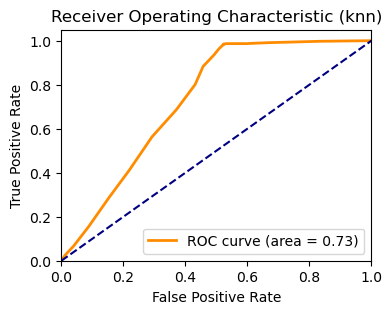

In [1538]:
fpr_knn, tpr_knn, _ = metrics.roc_curve(target_test, knn2.predict_proba(features_test)[:,1])

# построение ROC кривой
plt.figure(figsize=(4, 3))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (knn)')
plt.legend(loc="lower right")
plt.show()

In [1540]:
auc_dt = metrics.roc_auc_score(y1_test, dt2.predict_proba(x1_test)[:,1])
print("AUC: %.3f" % auc_dt)

AUC: 0.732


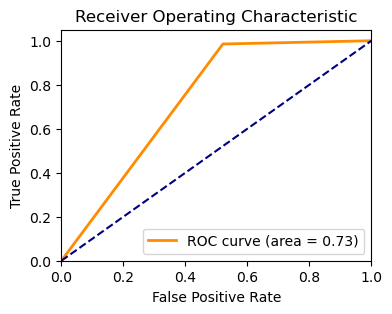

In [1542]:
fpr_dt, tpr_dt, _ = metrics.roc_curve(y1_test, dt2.predict_proba(x1_test)[:,1])

# построение ROC кривой
plt.figure(figsize=(4, 3))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_dt)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [1546]:
auc_rf = metrics.roc_auc_score(y1_test, rf2.predict_proba(x1_test)[:,1])
print("AUC: %.3f" % auc_rf)

AUC: 0.748


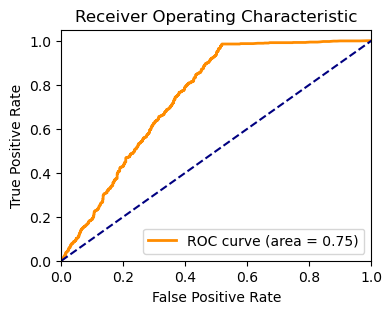

In [1548]:
fpr_rf, tpr_rf, _ = metrics.roc_curve(y1_test, rf2.predict_proba(x1_test)[:,1])

# построение ROC кривой
plt.figure(figsize=(4, 3))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [1550]:
auc_logit = metrics.roc_auc_score(y1_test, logit.predict_proba(x1_test)[:,1])
print("AUC: %.3f" % auc_logit)

AUC: 0.663


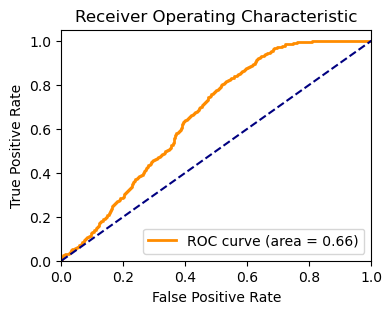

In [1552]:
fpr_logit, tpr_logit, _ = metrics.roc_curve(y1_test, logit.predict_proba(x1_test)[:,1])

# построение ROC кривой
plt.figure(figsize=(4, 3))
plt.plot(fpr_logit, tpr_logit, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_logit)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [1554]:
auc_gb = metrics.roc_auc_score(y1_test, gb3.predict_proba(x1_test)[:,1])
print("AUC: %.3f" % auc_gb)

AUC: 0.741


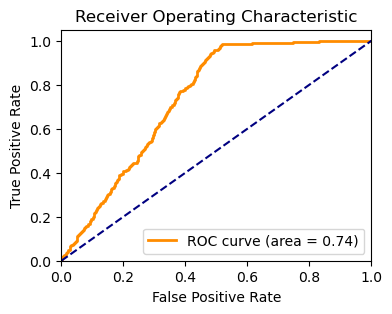

In [1556]:
fpr_gb, tpr_gb, _ = metrics.roc_curve(y1_test, gb3.predict_proba(x1_test)[:,1])

# построение ROC кривой
plt.figure(figsize=(4, 3))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_gb)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Confusion matrix

In [1558]:
cnf_matrix_knn = confusion_matrix(y1_test, knn2.predict(x1_test), labels=knn2.classes_)

In [1560]:
from sklearn.metrics import ConfusionMatrixDisplay

In [1562]:
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_knn, display_labels=knn2.classes_)

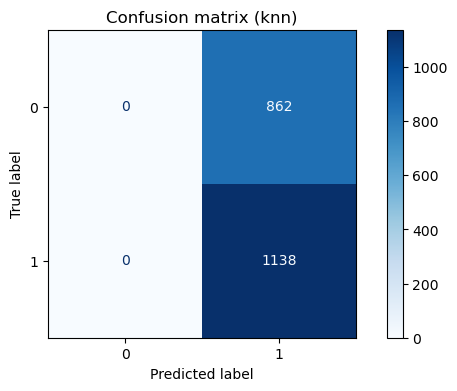

In [1564]:
fig, ax = plt.subplots(figsize=(8,4))
disp_knn.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion matrix (knn)')
plt.show()

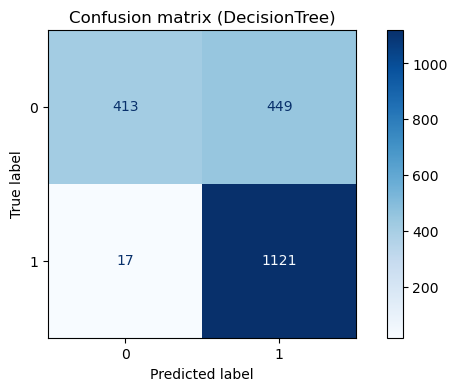

In [1566]:
cnf_matrix_dt = confusion_matrix(y1_test, dt2.predict(x1_test), labels=dt2.classes_)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_dt, display_labels=dt2.classes_)
fig, ax = plt.subplots(figsize=(8,4))
disp_dt.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion matrix (DecisionTree)')
plt.show()

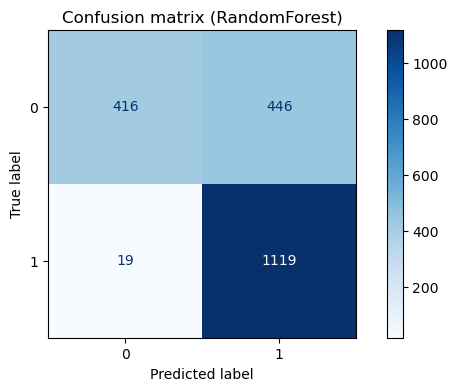

In [1568]:
cnf_matrix_rf = confusion_matrix(y1_test, rf2.predict(x1_test), labels=rf2.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_rf, display_labels=rf2.classes_)
fig, ax = plt.subplots(figsize=(8,4))
disp_rf.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion matrix (RandomForest)')
plt.show()

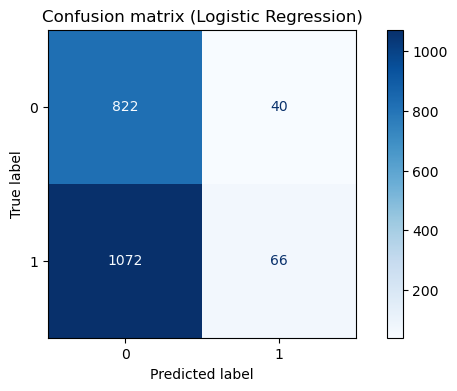

In [1570]:
cnf_matrix_logit = confusion_matrix(y1_test, logit.predict(x1_test), labels=logit.classes_)
disp_logit = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_logit, display_labels=logit.classes_)
fig, ax = plt.subplots(figsize=(8,4))
disp_logit.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion matrix (Logistic Regression)')
plt.show()

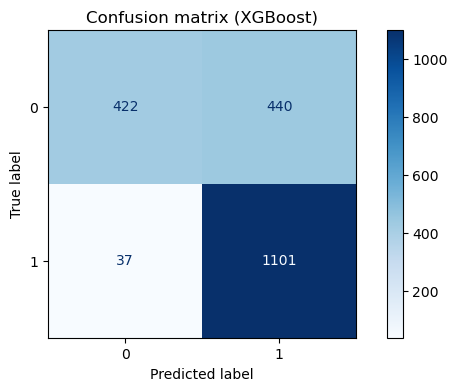

In [1572]:
cnf_matrix_gb = confusion_matrix(y1_test, gb3.predict(x1_test), labels=gb3.classes_)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_gb, display_labels=gb3.classes_)
fig, ax = plt.subplots(figsize=(8,4))
disp_gb.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion matrix (XGBoost)')
plt.show()

## Цены прогнозов  

In [1575]:
# Прогнозы
prediction_knn2 = knn2.predict(features_train)

In [1577]:
features_test.columns

Index(['bus', 'floor', 'year_built', 'flat_area', 'kitchen', 'bathroom',
       'rooms', 'floor_flat', 'bath', 'renovation', 'parking', 'primary',
       'mkad'],
      dtype='object')

In [1609]:
# Получим прогнозы на тестовой выборке с помощью модели
# с подобранными значениями гиперпараметров
prediction_test_knn = knn.predict(features_test)

# Рассмотрим прогнозы различного вида
  # автоматически
TN, FP, FN, TP = confusion_matrix(target_test, prediction_test_knn).ravel()
  # вручную
# TP = np.sum((target_test == 1) & (prediction_test_knn == 1))
# TN = np.sum((target_test == 0) & (prediction_test_knn == 0))
# FP = np.sum((target_test == 0) & (prediction_test_knn == 1))
# FN = np.sum((target_test == 1) & (prediction_test_knn == 0))
#   # сохраним результат
predictions_knn2 = pd.Series([TP, TN, FP, FN], index = ["TP", "TN", "FP", "FN"])
print(predictions_knn2)

TP    1102
TN     420
FP     442
FN      36
dtype: int64


In [1641]:
prices = pd.Series([10000, 3200, 0, -50000], index = ["TP", "TN", "FP", "FN"])

In [1643]:
# Оценим внутривыборочную прибыль от прогнозов
profit_knn2 = np.sum(prices * predictions_knn2)
print(profit_knn2)

10564000


## DAG

Опишите предполагаемые связи между переменными в форме ориентированного ациклического графа (DAG). Обучите структуру Байесовской сети на обучающей выборке и сравните точность прогнозов вашего и обученного DAG на тестовой выборке.

In [1651]:
# DAG

# Связи
edges = [
    ('floor', 'price'),         # (откуда стрелочка, куда стрелочка)
    ('year_built', 'price'),
    ('flat_area', 'price'),
    ('kitchen', 'price'),
    ('bathroom', 'price'),
    ('rooms', 'price'),
    ('floor_flat', 'price'),
    ('bath', 'price'),
    ('renovation', 'price'),
    ('parking', 'price'),
    ('primary', 'price'),
    ('mkad', 'price'),
    ('subway', 'price'),
    # ('quality', 'price'),
    # ('quality', 'subway'),
    ('bus', 'subway'),

]

# Инициализируем граф
G = nx.DiGraph(directed = True)
G.add_edges_from(edges)

In [1649]:
#!pip install bnlearn
import bnlearn

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orange3 3.36.2 requires scikit-learn!=1.2.*,<1.4,>=1.1.0, but you have scikit-learn 1.5.0 which is incompatible.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
streamlit 1.32.0 requires protobuf<5,>=3.20, but you have protobuf 5.29.2 which is incompatible.


     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
     -- ------------------------------------- 0.1/1.6 MB 1.5 MB/s eta 0:00:02
     ---- ----------------------------------- 0.2/1.6 MB 2.0 MB/s eta 0:00:01
     ---------- ----------------------------- 0.4/1.6 MB 2.8 MB/s eta 0:00:01
     ----------- ---------------------------- 0.5/1.6 MB 3.0 MB/s eta 0:00:01
     ------------ --------------------------- 0.5/1.6 MB 2.4 MB/s eta 0:00:01
     ------------ --------------------------- 0.5/1.6 MB 2.4 MB/s eta 0:00:01
     ------------------ --------------------- 0.7/1.6 MB 2.3 MB/s eta 0:00:01
     ------------------ --------------------- 0.7/1.6 MB 2.3 MB/s eta 0:00:01
     ---------------------- ----------------- 0.9/1.6 MB 2.2 MB/s eta 0:00:01
     --------------------------------- ------ 1.4/1.6 MB 2.8 MB/s eta 0:00:01
     -------------------------------------- - 1.6/1.6 MB 3.0 MB/s eta 0:00:01
     ---------------------------------------- 1.6/1.6 MB 3.0 MB/s eta 0

In [1653]:
DAG = bnlearn.make_DAG(edges)

[bnlearn] >bayes DAG created.


In [ ]:
# Оценим факторы
bn = bnlearn.parameter_learning.fit(DAG, df, methodtype = 'bayes')

In [ ]:
# Визуализируем DAG
bnlearn.plot(bn, interactive = False)

# 4. Регрессия

Отбрем признаки, которые могут быть полезны при прогнозировании цены на квадратный метр.

**Целевая переменная**
*   Цена 1 кв м жилой недвижимости (price)

Мы выбрали эти перемеенные, так как логично предполагать, что характеристики квартиры будут влиять на ее стоимость:

**Контрольные переменные:**
*   Количество этажей в доме (floor)
*   Год постройки дома (year_built)
*   Общая площадь квартиры (flat_area)
*   Площадь кухни (kitchen)
*   Площадь ванной комнаты (bathroom)
*   Количество комнат (rooms)
*   Этаж квартиры (floor_flat)
*   Наличие ванной (bath)
*   Тип ремонта (renovation)
*   Парковка (parking)
*   Первичная продажа жилой недвижимости / Вторичная продажа (primary)
*   Расположение жилья в пределах МКАДа (mkad)



**Инструментальная переменная**
*   Наличие автобусной / трамвайной остановки в шаговой доступности / 10 мин ходьбы (bus)

**Ненаблюдаемые переменные, порождающие эндогенность**:
*   Качество инфраструктуры района (quality):

Включает в себя общее состояние дорог, наличие парков, образовательных учреждений и других социальных услуг. Высокое качество инфраструктуры может способствовать повышению цен на жильё. Так как качество инфраструктуры не наблюдается напрямую, оно может создать смещение в оценках.

In [1658]:
y   = df.loc[:, ['price']]
x = df.loc[:, df.columns.drop(['price', 'subway', 'bus'])]
y   = np.squeeze(y)                # преобразуем из вектора столбца в одномерный массив
x.head()

# Разделим выборку на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 777)

# Убедимся, что обучающая и тестовая выборки имеют верные пропорции
print(x_train.index.size, x_test.index.size) # признаки
print(y_train.index.size, y_test.index.size)     # целевая переменная
x_train.head()

8000 2000
8000 2000


,floor,year_built,flat_area,kitchen,bathroom,rooms,floor_flat,bath,renovation,parking,primary,mkad
8490,20.0,1988.0,27.0,24.0,7.0,4.0,26.0,0,1,1,0.0,1.0
9788,28.0,1965.0,29.0,26.0,4.0,3.0,19.0,1,2,2,0.0,1.0
5967,16.0,1975.0,41.0,18.0,6.0,1.0,2.0,0,1,1,0.0,1.0
7519,37.0,1970.0,23.0,14.0,4.0,1.0,52.0,0,2,1,1.0,1.0
8614,5.0,1975.0,143.0,25.0,6.0,7.0,26.0,1,3,0,1.0,1.0


## OLS

In [1660]:
import statsmodels.api as sm                              # линейная регрессия
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error

# Оценим отдачу от образования с помощью метода наименьших квадратов
ls = sm.OLS(y_train, x_train).fit()
print(ls.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          5.173e+05
Date:                Fri, 20 Dec 2024   Prob (F-statistic):                        0.00
Time:                        23:43:16   Log-Likelihood:                         -87906.
No. Observations:                8000   AIC:                                  1.758e+05
Df Residuals:                    7988   BIC:                                  1.759e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [1662]:
pred_ls = ls.predict(x_test)
print('RMSE train:        ',np.sqrt(mean_squared_error(y_train, ls.predict(x_train))))   ## just check
print('RMSE train:        ',root_mean_squared_error(y_train,  ls.predict(x_train)))
print('RMSE test:         ',root_mean_squared_error(y_test, pred_ls))
print('MAPE train:        ',mean_absolute_percentage_error(y_train,  ls.predict(x_train)))
print('MAPE test:         ',mean_absolute_percentage_error(y_test, pred_ls))

RMSE train:         14319.089543454835
RMSE train:         14319.089543454835
RMSE test:          14659.121355772526
MAPE train:         0.03897458917195023
MAPE test:          0.03712603142522188


In [1664]:
ols = LinearRegression().fit(x_train, y_train)
print(ols.score(x_train, y_train))  ## R^2

print(ols.coef_)
print(ols.intercept_)
pred_ols = ols.predict(x_test)
pred_ols

0.9909850457277136
[-7.41878352e+00  1.80813959e+02  1.68649873e+02  5.46013167e+02
  3.44170245e+03  4.12961186e+02  1.48210923e+04  1.01413689e+03
  9.92570519e+01  5.77871474e+01  2.25652974e+03  1.52553355e+02]
-402342.97772675863


array([260301.07324807, 310564.50915022, 647902.91848633, ...,
       487511.46216798, 218139.45184559, 209469.51506946])

In [1666]:
from sklearn.model_selection import cross_val_score

## Посчитаем RMSE и MAPE на тренирововчной и тестовой выборках.
RMSE_train_ols = root_mean_squared_error(y_train,  ols.predict(x_train))
RMSE_test_ols = root_mean_squared_error(y_test, pred_ols)
MAPE_train_ols = mean_absolute_percentage_error(y_train,  ols.predict(x_train))
MAPE_test_ols = mean_absolute_percentage_error(y_test, pred_ols)

# Посчитаем RMSE и MAPE с помощью кросс-валидации (чем меньше, тем лучше)
RMSE_train_ols_cv  = -np.mean(cross_val_score(ols, x_train, y_train, scoring='neg_root_mean_squared_error', cv = 5))
RMSE_test_ols_cv = -np.mean(cross_val_score(ols, x_test, y_test, scoring='neg_root_mean_squared_error', cv = 5))
MAPE_train_ols_cv  = -np.mean(cross_val_score(ols, x_train, y_train, scoring='neg_mean_absolute_percentage_error', cv = 5))
MAPE_test_ols_cv = -np.mean(cross_val_score(ols, x_test, y_test, scoring='neg_mean_absolute_percentage_error', cv = 5))
## Посчитала и на тенировочной и на тестовой выборках. Далее использую только на тренировочной выборке.

In [1668]:
## Выводим все метрики до подбора пораметров
print(pd.DataFrame(data    = [RMSE_train_ols,
                              RMSE_test_ols,
                              RMSE_train_ols_cv,
                              MAPE_train_ols,
                              MAPE_test_ols,
                              MAPE_train_ols_cv],
                   index   = ['RMSE OLS (train)',
                              'RMSE OLS  (test)',
                              'RMSE OLS (cv)',
                              'MAPE OLS (train)',
                              'MAPE OLS (test)',
                              'MAPE OLS(cv)'
                              ],
                   columns = ['metrics']))

                       metrics
RMSE OLS (train)  14172.624326
RMSE OLS  (test)  14575.765889
RMSE OLS (cv)     14196.236976
MAPE OLS (train)      0.039288
MAPE OLS (test)       0.036990
MAPE OLS(cv)          0.039363


In [363]:
## Подбор гиперпараметров
from sklearn.model_selection import GridSearchCV
hyperparameters = {'fit_intercept': [True, False],
                   'copy_X': [True, False],
                   'positive': [False, True]
                   }


# Перебор гиперпараметров с помощью кросс-валидации
GSCV_ols = GridSearchCV(estimator  = ols,                                # модель
                       param_grid = hyperparameters,                     # перебираемые гиперпараметры
                       scoring    = "neg_root_mean_squared_error",       # метрика качества модели
                       cv         = 5)                                   # число фолдов в кросс-валидации
GSCV_ols.fit(x_train, y_train)                                           # подбор гиперпараметров на конкретных данных

# Достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_ols = GSCV_ols.best_params_

# Посмотрим на оптимальную глубину дерева
print('Best hyperparameters are: '+str(hyperparameters_ols))
print('Best score is: '+str(-GSCV_ols.best_score_))

Best hyperparameters are: {'copy_X': True, 'fit_intercept': True, 'positive': True}
Best score is: 12848.126651032926


In [1670]:
# Обучим модель с лучшими гиперпараметрами
ols2 = LinearRegression(copy_X=True, fit_intercept=True, positive=True).fit(x_train, y_train)
print(ols.score(x_train, y_train))  ## R^2

print(ols2.coef_)
print(ols2.intercept_)
pred_ols2 = ols2.predict(x_test)
pred_ols2

0.9909850457277136
[    0.           180.74220705   168.65325981   546.14929819
  3440.63376784   413.02235789 14821.09925808  1014.50171351
    99.76267101    58.26713202  2258.11537573   152.84400742]
-402386.7270457808


array([260404.98103871, 310586.78045741, 647859.66481426, ...,
       487534.83999617, 218133.03880949, 209430.42658264])

In [1672]:
# Оценим точность модели с подобранными гиперпараметрами
RMSE_train_ols2 = root_mean_squared_error(y_train,  ols2.predict(x_train)) # обучающая выборка
RMSE_test_ols2 = root_mean_squared_error(y_test,  ols2.predict(x_test)) # тестовая выборка

# Сравним результаты кросс-валидации (чем меньше, тем лучше)
RMSE_train_ols2_cv  = -np.mean(cross_val_score(ols2, x_train, y_train, scoring='neg_root_mean_squared_error', cv = 5))
RMSE_test_ols2_cv = -np.mean(cross_val_score(ols2, x_test, y_test, scoring='neg_root_mean_squared_error', cv = 5))
print(RMSE_train_ols2_cv)
print(RMSE_test_ols2_cv)


MAPE_train_ols2 = mean_absolute_percentage_error(y_train,  ols2.predict(x_train))
MAPE_test_ols2 = mean_absolute_percentage_error(y_test, pred_ols2)
MAPE_train_ols2_cv  = -np.mean(cross_val_score(ols2, x_train, y_train, scoring='neg_mean_absolute_percentage_error', cv = 5))

14191.854299962733
14585.190220439912


In [1674]:
## Выводим RMSE и MAPE метрики до подбора пораметров и после
print(pd.DataFrame(data    = {'RMSE': [
                              RMSE_train_ols,
                              RMSE_test_ols,
                              RMSE_train_ols_cv,
                              RMSE_train_ols2,
                              RMSE_test_ols2,
                              RMSE_train_ols2_cv
                              ],
                              'MAPE' : [
                              MAPE_train_ols,
                              MAPE_test_ols,
                              MAPE_train_ols_cv,
                              MAPE_train_ols2,
                              MAPE_test_ols2,
                              MAPE_train_ols2_cv
                              ]},
                   index   = ['OLS  (train)',
                              'OLS  (test)',
                              'OLS  (cv, train)',
                              'OLS2 (train)',
                              'OLS2 (test)',
                              'OLS2 (cv, train)'
                              ],
                   columns = ['RMSE', 'MAPE']))

                          RMSE      MAPE
OLS  (train)      14172.624326  0.039288
OLS  (test)       14575.765889  0.036990
OLS  (cv, train)  14196.236976  0.039363
OLS2 (train)      14172.813130  0.039284
OLS2 (test)       14573.787531  0.037005
OLS2 (cv, train)  14191.854300  0.039361


## Random Forest

In [1676]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor(max_depth=2, random_state=0)
RF_reg.fit(x_train, y_train)

print('R^2     ', RF_reg.score(x_train, y_train))  ## R^2
pred_RF_reg = RF_reg.predict(x_test)
pred_RF_reg

R^2      0.88005470983367


array([307779.91149478, 307779.91149478, 590387.48374994, ...,
       438825.36584341, 165305.82366695, 151248.67785773])

In [1678]:
## Посчитаем RMSE и MAPE на тренирововчной и тестовой выборках.
RMSE_train_RF = root_mean_squared_error(y_train,  RF_reg.predict(x_train))
RMSE_test_RF = root_mean_squared_error(y_test, pred_RF_reg)
MAPE_train_RF = mean_absolute_percentage_error(y_train,  RF_reg.predict(x_train))
MAPE_test_RF = mean_absolute_percentage_error(y_test, pred_RF_reg)

# Посчитаем RMSE и MAPE с помощью кросс-валидации (чем меньше, тем лучше)
RMSE_train_RF_cv  = -np.mean(cross_val_score(RF_reg, x_train, y_train, scoring='neg_root_mean_squared_error', cv = 5))
RMSE_test_RF_cv = -np.mean(cross_val_score(RF_reg, x_test, y_test, scoring='neg_root_mean_squared_error', cv = 5))
MAPE_train_RF_cv  = -np.mean(cross_val_score(RF_reg, x_train, y_train, scoring='neg_mean_absolute_percentage_error', cv = 5))
MAPE_test_RF_cv = -np.mean(cross_val_score(RF_reg, x_test, y_test, scoring='neg_mean_absolute_percentage_error', cv = 5))

## Выводим все метрики до подбора пораметров
print(pd.DataFrame(data    = {'RMSE': [
                              RMSE_train_RF,
                              RMSE_test_RF,
                              RMSE_train_RF_cv
                              ],
                              'MAPE' : [
                              MAPE_train_RF,
                              MAPE_test_RF,
                              MAPE_train_RF_cv,
                              ]},
                   index   = ['Random Forest  (train)',
                              'Random Forest  (test)',
                              'Random Forest  (cv, train)',
                              ],
                   columns = ['RMSE', 'MAPE']))

                                    RMSE      MAPE
Random Forest  (train)      51696.377386  0.233175
Random Forest  (test)       51970.062231  0.203611
Random Forest  (cv, train)  51272.504946  0.231041


In [377]:
# подбор гиперпараметров
# перебираемые значения гиперпараметров
grid_space={'max_depth': [5, 10,15, 20, 25],
              'n_estimators':[100, 200, 300, 400],
              'max_features':[5,9, 12, 15],
           }

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_RF_reg = GridSearchCV(estimator  = RF_reg,
                       param_grid     = grid_space,
                       scoring        = "neg_root_mean_squared_error",
                       cv             = 5)
model_GSCV_RF_reg = GSCV_RF_reg.fit(x_train, y_train)

# Достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_RF_reg = GSCV_RF_reg.best_params_
print('Best hyperparameters are: '+str(hyperparameters_RF_reg))
print('Best score is: '+str(-model_GSCV_RF_reg.best_score_))

Best hyperparameters are: {'max_depth': 15, 'max_features': 9, 'n_estimators': 400}
Best score is: 11679.407635051162


In [1680]:
print('Best hyperparameters are: '+str(hyperparameters_RF_reg))
print('Best score is: '+str(-model_GSCV_RF_reg.best_score_))

Best hyperparameters are: {'max_depth': 15, 'max_features': 9, 'n_estimators': 400}
Best score is: 11679.407635051162


In [1682]:
# Обучим модель с лучшими гиперпараметрами
RF_reg2 = RandomForestRegressor(max_depth = hyperparameters_RF_reg['max_depth'],
                             max_features = hyperparameters_RF_reg['max_features'],
                             max_samples  = 500,
                             random_state = 777,
                             criterion    = 'squared_error',   ## это не RMSE, но вроде так и должно быть (немного путаюсь)
                             n_estimators = hyperparameters_RF_reg['n_estimators'])

RF_reg2.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features=9, max_samples=500,
                      n_estimators=400, random_state=777)

In [1684]:
# Оценим точность модели с подобранными гиперпараметрами
RMSE_train_RF2 = root_mean_squared_error(y_train,  RF_reg2.predict(x_train)) # обучающая выборка
RMSE_test_RF2 = root_mean_squared_error(y_test,  RF_reg2.predict(x_test)) # тестовая выборка

MAPE_train_RF2 = mean_absolute_percentage_error(y_train,  RF_reg2.predict(x_train))
MAPE_test_RF2 = mean_absolute_percentage_error(y_test,  RF_reg2.predict(x_test))

# Сравним результаты кросс-валидации (чем меньше, тем лучше)
RMSE_train_RF2_cv  = -np.mean(cross_val_score(RF_reg2, x_train, y_train, scoring='neg_root_mean_squared_error', cv = 5))
RMSE_test_RF2_cv = -np.mean(cross_val_score(RF_reg2, x_test, y_test, scoring='neg_root_mean_squared_error', cv = 5))

MAPE_train_RF2_cv = -np.mean(cross_val_score(RF_reg2, x_train, y_train, scoring='neg_mean_absolute_percentage_error', cv = 5))
MAPE_test_RF2_cv = -np.mean(cross_val_score(RF_reg2, x_test, y_test, scoring='neg_mean_absolute_percentage_error', cv = 5))

In [1687]:
## Выводим RMSE и MAPE метрики до подбора пораметров и после
print(pd.DataFrame(data    = {'RMSE': [
                              RMSE_train_RF,
                              RMSE_test_RF,
                              RMSE_train_RF_cv,
                              RMSE_train_RF2,
                              RMSE_test_RF2,
                              RMSE_train_RF2_cv
                              ],
                              'MAPE' : [
                              MAPE_train_RF,
                              MAPE_test_RF,
                              MAPE_train_RF_cv,
                              MAPE_train_RF2,
                              MAPE_test_RF2,
                              MAPE_train_RF2_cv
                              ]},
                   index   = ['Random Forest   (train)',
                              'Random Forest   (test)',
                              'Random Forest   (cv, train)',
                              'Random Forest 2 (train)',
                              'Random Forest 2 (test)',
                              'Random Forest 2 (cv, train)'
                              ],
                   columns = ['RMSE', 'MAPE']))

                                     RMSE      MAPE
Random Forest   (train)      51696.377386  0.233175
Random Forest   (test)       51970.062231  0.203611
Random Forest   (cv, train)  51272.504946  0.231041
Random Forest 2 (train)      14573.608207  0.041358
Random Forest 2 (test)       16342.722970  0.039606
Random Forest 2 (cv, train)  15539.210770  0.044537


## KNN

In [1689]:
## Standartization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

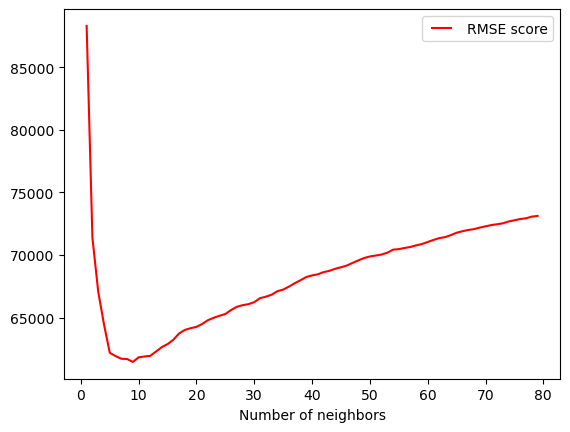

In [399]:
from sklearn.neighbors  import KNeighborsRegressor

RMSE = []
neighbors = range(1,80)

for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    RMSE.append(root_mean_squared_error(y_test, y_pred))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(neighbors, RMSE, 'r', label='RMSE score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.xlabel('Number of neighbors')
plt.show()

In [1691]:
print('Smaller RMSE is ', min(RMSE))
print('Smaller RMSE is for k =', RMSE.index(min(RMSE))+1)

Smaller RMSE is  61455.598648345374
Smaller RMSE is for k = 9


In [1693]:
knn_reg =KNeighborsRegressor(n_neighbors=8, weights='distance', p=2)
knn_reg.fit(x_train, y_train)

print(knn_reg.score(x_train, y_train))  ## R^2
pred_knn_reg = knn_reg.predict(x_test)
pred_knn_reg

1.0


array([271771.87682748, 320595.88366984, 531169.32966738, ...,
       455920.19700898, 282961.38533197, 267860.02546927])

In [1695]:
## Посчитаем RMSE и MAPE на тренирововчной и тестовой выборках.
RMSE_train_knn = root_mean_squared_error(y_train,  knn_reg.predict(x_train))     ### ПОЧЕМУ НУЛИ???
MAPE_train_knn = mean_absolute_percentage_error(y_train,  knn_reg.predict(x_train))
RMSE_test_knn = root_mean_squared_error(y_test, pred_knn_reg)
MAPE_test_knn = mean_absolute_percentage_error(y_test, pred_knn_reg)

# Посчитаем RMSE и MAPE с помощью кросс-валидации (чем меньше, тем лучше)
RMSE_train_knn_cv  = -np.mean(cross_val_score(knn_reg, x_train, y_train, scoring='neg_root_mean_squared_error', cv = 5))
RMSE_test_knn_cv = -np.mean(cross_val_score(knn_reg, x_test, y_test, scoring='neg_root_mean_squared_error', cv = 5))
MAPE_train_knn_cv  = -np.mean(cross_val_score(knn_reg, x_train, y_train, scoring='neg_mean_absolute_percentage_error', cv = 5))
MAPE_test_knn_cv = -np.mean(cross_val_score(knn_reg, x_test, y_test, scoring='neg_mean_absolute_percentage_error', cv = 5))

## Выводим все метрики до подбора пораметров
print(pd.DataFrame(data    = {'RMSE': [
                              RMSE_train_knn,
                              RMSE_test_knn,
                              RMSE_train_knn_cv,
                              ],
                              'MAPE' : [
                              MAPE_train_knn,
                              MAPE_test_knn,
                              MAPE_train_knn_cv
                              ]},
                   index   = ['KNN  (train)',
                              'KNN  (test)',
                              'KNN  (cv, train)',
                              ],
                   columns = ['RMSE', 'MAPE']))

                          RMSE      MAPE
KNN  (train)          0.000000  0.000000
KNN  (test)       57644.976069  0.224247
KNN  (cv, train)  61436.473345  0.270319


In [407]:
# Перебираемые значения гиперпараметров
hyperparameters = {'n_neighbors': [3, 5, 6, 7, 8, 10, 15, 20, 30],
                   'p': [1, 2, 3],
                   'weights': ['distance', 'uniform']}

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_knn_reg = GridSearchCV(estimator  = knn_reg,                         # модель
                        param_grid = hyperparameters,                     # перебираемые гиперпараметры
                        scoring    = "neg_root_mean_squared_error",       # метрика качества модели
                        cv         = 5)                                   # число фолдов в кросс-валидации
GSCV_knn_reg.fit(x_train, y_train)                                        # подбор гиперпараметров на конкретных данных

# Достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_best = GSCV_knn_reg.best_params_
print(hyperparameters_best)

{'n_neighbors': 8, 'p': 2, 'weights': 'distance'}


In [1701]:
# Обучим модель с лучшими гиперпараметрами
knn_reg2 = KNeighborsRegressor(n_neighbors = hyperparameters_best["n_neighbors"],
                            metric      = "minkowski",
                            p           = hyperparameters_best["p"])
knn_reg2.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=32)

In [1703]:
# Оценим точность модели с подобранными гиперпараметрами
RMSE_train_knn2 = root_mean_squared_error(y_train,  knn_reg2.predict(x_train)) # обучающая выборка
RMSE_test_knn2 = root_mean_squared_error(y_test,  knn_reg2.predict(x_test)) # тестовая выборка
MAPE_train_knn2 = mean_absolute_percentage_error(y_train,  knn_reg2.predict(x_train)) # обучающая выборка
MAPE_test_knn2 = mean_absolute_percentage_error(y_test,  knn_reg2.predict(x_test)) # тестовая выборка

# Сравним результаты кросс-валидации (чем меньше, тем лучше)
RMSE_train_knn2_cv  = -np.mean(cross_val_score(knn_reg2, x_train, y_train, scoring='neg_root_mean_squared_error', cv = 5))
RMSE_test_knn2_cv = -np.mean(cross_val_score(knn_reg2, x_test, y_test, scoring='neg_root_mean_squared_error', cv = 5))
MAPE_train_knn2_cv  = -np.mean(cross_val_score(knn_reg2, x_train, y_train, scoring='neg_mean_absolute_percentage_error', cv = 5))
MAPE_test_knn2_cv = -np.mean(cross_val_score(knn_reg2, x_test, y_test, scoring='neg_mean_absolute_percentage_error', cv = 5))

In [1705]:
## Выводим RMSE и MAPE метрики до подбора пораметров и после
print(pd.DataFrame(data    = {'RMSE': [
                              RMSE_train_knn,
                              RMSE_test_knn,
                              RMSE_train_knn_cv,
                              RMSE_train_knn2,
                              RMSE_test_knn2,
                              RMSE_train_knn2_cv
                              ],
                              'MAPE' : [
                              MAPE_train_knn,
                              MAPE_test_knn,
                              MAPE_train_knn_cv,
                              MAPE_train_knn2,
                              MAPE_test_knn2,
                              MAPE_train_knn2_cv
                              ]},
                   index   = ['KNN   (train)',
                              'KNN   (test)',
                              'KNN   (cv, train)',
                              'KNN 2 (train)',
                              'KNN 2 (test)',
                              'KNN 2 (cv, train)'
                              ],
                   columns = ['RMSE', 'MAPE']))

                           RMSE      MAPE
KNN   (train)          0.000000  0.000000
KNN   (test)       57644.976069  0.224247
KNN   (cv, train)  61436.473345  0.270319
KNN 2 (train)      63613.879076  0.294805
KNN 2 (test)       65121.653344  0.264675
KNN 2 (cv, train)  67751.584228  0.315014


## GBoost

In [1707]:
from sklearn.ensemble import GradientBoostingRegressor

GB_reg = GradientBoostingRegressor(random_state=0)
GB_reg.fit(x_train, y_train)

print(GB_reg.score(x_test, y_test))  ## R^2
pred_GB_reg = GB_reg.predict(x_test)
pred_GB_reg

0.991218542984949


array([263172.27383701, 307950.49191704, 655411.84143927, ...,
       486417.8901803 , 220040.63362089, 202161.2116291 ])

In [1709]:
## Посчитаем RMSE и MAPE на тренирововчной и тестовой выборках.
RMSE_train_GB = root_mean_squared_error(y_train,  GB_reg.predict(x_train))
MAPE_train_GB = mean_absolute_percentage_error(y_train,  GB_reg.predict(x_train))
RMSE_test_GB = root_mean_squared_error(y_test, pred_GB_reg)
MAPE_test_GB = mean_absolute_percentage_error(y_test, pred_GB_reg)

# Посчитаем RMSE и MAPE с помощью кросс-валидации (чем меньше, тем лучше)
RMSE_train_GB_cv  = -np.mean(cross_val_score(GB_reg, x_train, y_train, scoring='neg_root_mean_squared_error', cv = 5))
RMSE_test_GB_cv = -np.mean(cross_val_score(GB_reg, x_test, y_test, scoring='neg_root_mean_squared_error', cv = 5))
MAPE_train_GB_cv  = -np.mean(cross_val_score(GB_reg, x_train, y_train, scoring='neg_mean_absolute_percentage_error', cv = 5))
MAPE_test_GB_cv = -np.mean(cross_val_score(GB_reg, x_test, y_test, scoring='neg_mean_absolute_percentage_error', cv = 5))

## Выводим все метрики до подбора пораметров
print(pd.DataFrame(data    = {'RMSE': [
                              RMSE_train_GB,
                              RMSE_test_GB,
                              RMSE_train_GB_cv
                              ],
                              'MAPE' : [
                              MAPE_train_GB,
                              MAPE_test_GB,
                              MAPE_train_GB_cv
                              ]},
                   index   = ['Gradient Boosting Regression  (train)',
                              'Gradient Boosting Regression  (test)',
                              'Gradient Boosting Regression  (cv, train)'
                              ],
                   columns = ['RMSE', 'MAPE']))

                                                   RMSE      MAPE
Gradient Boosting Regression  (train)      12124.088686  0.030497
Gradient Boosting Regression  (test)       13796.123970  0.031260
Gradient Boosting Regression  (cv, train)  13346.871555  0.032328


In [419]:
# Перебираемые значения гиперпараметров
hyperparameters = {
    "learning_rate": [0.1, 0.3, 0.5],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 3],
    "max_depth":[2, 3, 4, 5, 7,],
    "max_features":["sqrt", None],
    "subsample":[0.5, 0.75]
    }

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_GB_reg = GridSearchCV(estimator  = GB_reg,                               # модель
                        param_grid = hyperparameters,                         # перебираемые гиперпараметры
                        scoring    = "neg_root_mean_squared_error",           # метрика качества модели
                        cv         = 5)                                       # число фолдов в кросс-валидации
GSCV_GB_reg.fit(x_train, y_train)                                             # подбор гиперпараметров на конкретных данных

# Достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_GB_reg = GSCV_GB_reg.best_params_
print(hyperparameters_GB_reg)

{'learning_rate': 0.1, 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 6, 'subsample': 0.75}


In [1711]:
# Обучим модель с лучшими гиперпараметрами
GB_reg2 = GradientBoostingRegressor(learning_rate   = hyperparameters_GB_reg["learning_rate"],
                            min_samples_split       = hyperparameters_GB_reg["min_samples_split"],
                            min_samples_leaf        = hyperparameters_GB_reg["min_samples_leaf"],
                            max_depth               = hyperparameters_GB_reg["max_depth"],
                            max_features            = hyperparameters_GB_reg["max_features"],
                            subsample               = hyperparameters_GB_reg["subsample"])
GB_reg2.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=6,
                          subsample=0.75)

In [ ]:
# # Обучим модель с лучшими гиперпараметрами
# GB_reg2 = GradientBoostingRegressor(learning_rate   =0.1,
#                             min_samples_split       = 6,
#                             min_samples_leaf        = 2,
#                             max_depth               = 4,
#                             max_features            = None,
#                             subsample               = 0.75)
# GB_reg2.fit(x_train, y_train)

In [1713]:
# Оценим точность модели с подобранными гиперпараметрами
RMSE_train_GB2 = root_mean_squared_error(y_train,  GB_reg2.predict(x_train)) # обучающая выборка
RMSE_test_GB2 = root_mean_squared_error(y_test,  GB_reg2.predict(x_test)) # тестовая выборка
MAPE_train_GB2 = mean_absolute_percentage_error(y_train,  GB_reg2.predict(x_train)) # обучающая выборка
MAPE_test_GB2 = mean_absolute_percentage_error(y_test,  GB_reg2.predict(x_test)) # тестовая выборка


# Сравним результаты кросс-валидации (чем меньше, тем лучше)
RMSE_train_GB2_cv  = -np.mean(cross_val_score(GB_reg2, x_train, y_train, scoring='neg_root_mean_squared_error', cv = 5))
RMSE_test_GB2_cv = -np.mean(cross_val_score(GB_reg2, x_test, y_test, scoring='neg_root_mean_squared_error', cv = 5))
MAPE_train_GB2_cv  = -np.mean(cross_val_score(GB_reg2, x_train, y_train, scoring='neg_mean_absolute_percentage_error', cv = 5))
MAPE_test_GB2_cv = -np.mean(cross_val_score(GB_reg2, x_test, y_test, scoring='neg_mean_absolute_percentage_error', cv = 5))

In [1715]:
## Выводим RMSE и MAPE метрики до подбора пораметров и после
print(pd.DataFrame(data    = {'RMSE': [
                              RMSE_train_GB,
                              RMSE_test_GB,
                              RMSE_train_GB_cv,
                              RMSE_train_GB2,
                              RMSE_test_GB2,
                              RMSE_train_GB2_cv
                              ],
                              'MAPE' : [
                              MAPE_train_GB,
                              MAPE_test_GB,
                              MAPE_train_GB_cv,
                              MAPE_train_GB2,
                              MAPE_test_GB2,
                              MAPE_train_GB2_cv
                              ]},
                   index   = ['Gradient Boosting Regression  (train)',
                              'Gradient Boosting Regression   (test)',
                              'Gradient Boosting Regression    (cv, train)',
                              'Gradient Boosting Regression  2 (train)',
                              'Gradient Boosting Regression  2 (test)',
                              'Gradient Boosting Regression  2 (cv, train)'
                              ],
                   columns = ['RMSE', 'MAPE']))

                                                     RMSE      MAPE
Gradient Boosting Regression  (train)        12124.088686  0.030497
Gradient Boosting Regression   (test)        13796.123970  0.031260
Gradient Boosting Regression    (cv, train)  13346.871555  0.032328
Gradient Boosting Regression  2 (train)      11450.870872  0.028355
Gradient Boosting Regression  2 (test)       13907.300279  0.030913
Gradient Boosting Regression  2 (cv, train)  13499.549879  0.031252


### Out-of-bag errors
Подберите на обучающей выборке оптимальные
значения гиперпараметров градиентного бустинга ориентируясь на значение
OOB (out-of-bag) ошибки. Сопоставьте гиперпараметры и точность на тесто
вой выборке для градиентного бустинга в зависимости от того, используется
 кросс-валидация или OOB ошибка.

In [1717]:
# Ошибка неотобранных элементов (OOB error)

GB_reg.oob_score = True                         # укажем необходимость подсчета OOB
GB_reg.fit(x_train, y_train)                    # обучим модель рассчитав OOB
oob_GB_reg = 1 - GB_reg.oob_score

In [1719]:
# Повторим оценивание с другим числом признаков
GB_reg2              = deepcopy(GB_reg)
GB_reg2.max_features = 3                          # число случайно выбираемых при каждом разбиении узла признаков
GB_reg2.fit(x_train, y_train)                     # обучаем новую модель
oob_GB_reg2 = 1 - GB_reg2.oob_score               # значение OOB

# Сравним OOB моделей (чем меньше, тем лучше)
print(pd.DataFrame(data    = [oob_GB_reg, oob_GB_reg2],
                   index   = ['Градиентный бустинг 1', 'Градиентный бустинг 2'],
                   columns = ['OOB']))

                       OOB
Градиентный бустинг 1    0
Градиентный бустинг 2    0


In [1728]:
# Сравним результаты ООв (чем меньше, тем лучше)
RMSE_train_oob_GB=-np.mean(cross_val_score(GB_reg, x_train, y_train, scoring='neg_root_mean_squared_error', cv = 5))
RMSE_train_oob_GB2=-np.mean(cross_val_score(GB_reg2, x_train, y_train, scoring='neg_root_mean_squared_error', cv = 5))

# RMSE_train_oob_GB = root_mean_squared_error(y_train,  GB_reg.predict(x_train))
# RMSE_test_oob_GB2 = root_mean_squared_error(y_test,  GB_reg2.predict(x_train))

print(pd.DataFrame(data    = [RMSE_train_oob_GB, RMSE_train_oob_GB2],
                   index   = ['Градиентный бустинг 1', 'Градиентный бустинг 2'],
                   columns = ['RMSE-CV']))

                            RMSE-CV
Градиентный бустинг 1  13346.871555
Градиентный бустинг 2  20417.828726


Наилучшей моделью регрессии оказался GBoost.

Xудшей - KNN (переобучение и на стандартизированных данных, и на исходных)

In [1730]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Сводная по регрессии

In [1732]:
## RMSE и MAPE после подбора параметров 
summary_tab_cf = pd.DataFrame(data = [[ols.get_params(), GSCV_ols.best_params_, RMSE_train_ols, RMSE_test_ols, RMSE_train_ols_cv,
                                                                                MAPE_train_ols, MAPE_test_ols, MAPE_train_ols_cv],
                                      [RF_reg.get_params(), GSCV_RF_reg.best_params_, RMSE_train_RF, RMSE_test_RF, RMSE_train_RF_cv,
                                                                                MAPE_train_RF, MAPE_test_RF, MAPE_train_RF_cv],
                                      [knn_reg.get_params(), GSCV_knn_reg.best_params_, RMSE_train_knn, RMSE_test_knn, RMSE_train_knn_cv,
                                                                                MAPE_train_knn, MAPE_test_knn, MAPE_train_knn_cv],
                                      [GB_reg.get_params(), GSCV_GB_reg.best_params_, RMSE_train_GB, RMSE_test_GB, RMSE_train_GB_cv,
                                                                                MAPE_train_GB, MAPE_test_GB, MAPE_train_GB_cv],
                                      ],
                              index = ['МНК',
                                       'Случайный лес',
                                       'k ближайших соседей',
                                       'Градиентный бустинг'],
                              columns = ['изначальные параметры ',
                                         'подобранные параметры',
                                        'RMSE на train',
                                         'RMSE на test',
                                         'RMSE на train CV',
                                         'MAPE на train ',
                                         'MAPE на test',
                                         'MAPE на train CV'])
summary_tab_cf

,изначальные параметры,подобранные параметры,RMSE на train,RMSE на test,RMSE на train CV,MAPE на train,MAPE на test,MAPE на train CV
МНК,"{'copy_X': True, 'fit_intercept': True, 'n_job...","{'copy_X': True, 'fit_intercept': True, 'posit...",14172.624326,14575.765889,14196.236976,0.039288,0.036990,0.039363
Случайный лес,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...","{'max_depth': 15, 'max_features': 9, 'n_estima...",51696.377386,51970.062231,51272.504946,0.233175,0.203611,0.231041
k ближайших соседей,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...","{'n_neighbors': 8, 'p': 2, 'weights': 'distance'}",0.000000,57644.976069,61436.473345,0.000000,0.224247,0.270319
Градиентный бустинг,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...","{'learning_rate': 0.1, 'max_depth': 4, 'max_fe...",12124.088686,13796.123970,13346.871555,0.030497,0.031260,0.032328


In [1293]:
print(summary_tab_cf.to_latex(index=True,
                  caption="Сводная по регрессии",
                  label="tab:summary_tab_cf",
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,))

#[['изначальные параметры', 'подобранные параметры']]

\begin{table}
\caption{Сводная по регрессии}
\label{tab:summary_tab_cf}
\begin{tabular}{lllrrrrrr}
\toprule
 & изначальные параметры  & подобранные параметры & RMSE на train & RMSE на test & RMSE на train CV & MAPE на train  & MAPE на test & MAPE на train CV \\
\midrule
МНК & {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False} & {'copy_X': True, 'fit_intercept': True, 'positive': True} & 826320.33 & 13072.79 & 12850.40 & 2.83 & 0.03 & 0.04 \\
Случайный лес & {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 2, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False} & {'max_depth': 15, 'max_features': 9, 'n_estimators': 400} & 51696.38 & 51970.06 & 51272.50 & 0.23 & 0.20 & 0.23 \\
k б

# 5. Эффекты воздействия

## Настоящие эффекты воздействия (не наблюдаются в данных)
 Так как мы работает с симмулированными данными у нас есть ненаблюдаемые значения зависимой переменной, т.е. есть цена за квадратный метр для квартиры, около которой есть метро, в ситуации если бы метро в ней не было.

In [1734]:
# Аггрегируем данные в датафрейм
df = pd.DataFrame({'price': price, 'subway': subway, 'bus': bus,
                   'floor': floor, 'year_built': year_built,
                   'flat_area': flat_area , 'kitchen': kitchen,
                   'bathroom': bathroom, 'rooms': rooms,
                   'floor_flat': floor_flat, 'bath': bath,
                   'renovation': renovation, 'parking': parking,
                   'primary': primary, 'mkad': mkad, 'quality': quality})
df = df.loc[0:n, :]

# Посмотрим на симулированные данные
df.head(10).style.format(precision = 0)

,price,subway,bus,floor,year_built,flat_area,kitchen,bathroom,rooms,floor_flat,bath,renovation,parking,primary,mkad,quality
0,457338,1,1,14,1968,126,15,7,9,29,0,1,2,0,1,69
1,191722,1,1,35,1977,181,16,5,4,12,0,2,2,1,1,82
2,272063,1,1,28,1972,51,29,4,9,18,1,1,2,1,1,56
3,538481,0,1,10,2004,111,29,6,5,36,1,1,2,1,0,38
4,257823,0,1,19,1987,15,27,6,1,18,1,2,2,1,1,50
5,515298,1,1,42,1982,30,18,5,1,35,0,1,1,0,1,63
6,324430,0,0,1,1975,223,17,4,2,22,0,2,1,0,1,72
7,319320,1,1,21,1969,42,18,3,3,22,0,1,0,0,1,74
8,289874,1,1,38,1980,64,25,5,6,19,0,0,2,0,1,64
9,436617,0,1,16,1976,57,23,4,2,31,1,2,1,1,1,48


In [1736]:
# Эффект воздействия
TE = price1 - price0

# Средний эффект воздействия
ATE = np.mean(TE)

# Локальный эффект воздействия
LATE = np.mean(TE[compliers])

# Условный средний эффект воздействия
CATE = g1 - g0

# Средний эффект воздействия на подвергшихся воздействию
ATET = np.mean(TE[subway == 1])

# Сравнение точного приближения и наивной оценки
treatment_effects = pd.DataFrame(data    = [ ATE, LATE, ATET],
                   index   = ['ATE', 'LATE', 'ATET'],
                   columns = ['Истинное значение'])

print(treatment_effects)

      Истинное значение
ATE        22523.671127
LATE       22632.535301
ATET       22693.959880


In [728]:
print(treatment_effects.to_latex(index=True,
                  caption="Истинные эффекты воздействия",
                  label="tab:treatment_effects",
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,))

\begin{table}
\caption{Истинные эффекты воздействия}
\label{tab:treatment_effects}
\begin{tabular}{lr}
\toprule
 & Истинное значение \\
\midrule
ATE & 22523.71 \\
LATE & 22632.80 \\
ATET & 22694.11 \\
\bottomrule
\end{tabular}
\end{table}



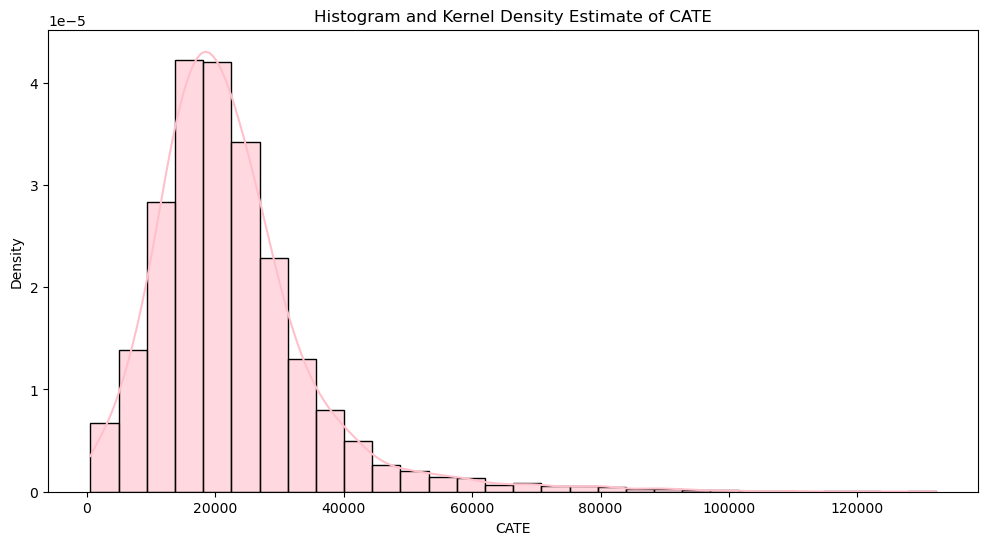

In [1738]:
## CATE density:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(CATE, bins=30, kde=True, stat='density', color='pink', alpha=0.6)
plt.title('Histogram and Kernel Density Estimate of CATE')
plt.xlabel('CATE')
plt.ylabel('Density')
plt.show()

## Оценка ATE как разницы в средних

In [1740]:
# Наивная оценка как разница в выборочных средних
ATE_naive = np.mean(price[subway == 1]) - np.mean(price[subway == 0])

# Сравнение точного приближения и наивной оценки
print(pd.DataFrame(data    = [ATE, ATE_naive],
                   index   = ['ATE', 'ATE naive'],
                   columns = ['Оценка']))

                 Оценка
ATE        22523.671127
ATE naive  24905.065104


In [1742]:
y = df.loc[:, ['price']]
x = df.iloc[:, 1:16]
y   = np.squeeze(y)                # преобразуем из вектора столбца в одномерный массив
x.head()

,subway,bus,floor,year_built,flat_area,kitchen,bathroom,rooms,floor_flat,bath,renovation,parking,primary,mkad,quality
0,1,1,14.0,1968.0,126.0,15.0,7.0,9.0,29.0,0,1,2,0.0,1.0,69.0
1,1,1,35.0,1977.0,181.0,16.0,5.0,4.0,12.0,0,2,2,1.0,1.0,82.0
2,1,1,28.0,1972.0,51.0,29.0,4.0,9.0,18.0,1,1,2,1.0,1.0,56.0
3,0,1,10.0,2004.0,111.0,29.0,6.0,5.0,36.0,1,1,2,1.0,0.0,38.0
4,0,1,19.0,1987.0,15.0,27.0,6.0,1.0,18.0,1,2,2,1.0,1.0,50.0


## Оценка ATE

### МНК

In [1744]:
# Оценим средний эффект воздействия с помощью МНК

# МНК оценивание уравнения цены за квадратный метр для
# квартир, рядом с которыми нет метро
import statsmodels.api as sm
y0  = df.loc[subway == 0, 'price']
x0  = df.loc[subway == 0, df.columns.drop(['price', 'bus', 'subway'])]
x0  = sm.add_constant(x0)
ls0 = sm.OLS(y0, x0).fit()

# МНК оценивание уравнения цены на квадратный метр для
# квартир, рядом с которыми есть метро
y1  = df.loc[subway == 1, ['price']]
x1  = df.loc[subway == 1, df.columns.drop(['price', 'bus', 'subway'])]
x1  = sm.add_constant(x1)
ls1 = sm.OLS(y1, x1).fit()

# Оценим цены за квадратный метр при наличии и отсутствия метро
# с помощью полученных МНК оценок
x = df.loc[:, df.columns.drop(['price', 'bus', 'subway'])]
x = sm.add_constant(x)
y = df.loc[:, 'price']

In [1746]:
  # МНК оценка E(price0 | X) для всех квартир
price0_ls = ls0.predict(x)
  # МНК оценка E(price1 | X) для всех квартир
price1_ls = ls1.predict(x)

# Оценки CATE
CATE_ls = np.array(price1_ls - price0_ls)

# Оценка ATE как средняя разница в прогнозах МНК оценок
ATE_ls = np.mean(CATE_ls)

# Сравним результаты
print(pd.DataFrame(data    = [ATE, ATE_naive, ATE_ls],
                   index   = ['ATE', 'ATE naive', "ATE ls"],
                   columns = ['Оценка']))

                 Оценка
ATE        22523.671127
ATE naive  24905.065104
ATE ls     22565.563361


### Условные математические ожидания

#### T-learner

In [659]:
print(x0.shape)
y0.shape

(4407, 14)


(4407,)

In [1748]:
import statsmodels.api as sm
y0  = df.loc[subway == 0, 'price']
x0  = df.loc[subway == 0, df.columns.drop(['price', 'bus', 'subway'])]
x0  = sm.add_constant(x0)
ls0 = sm.OLS(y0, x0).fit()

# МНК оценивание уравнения цены на квадратный метр для
# квартир, рядом с которыми есть метро
y1  = df.loc[subway == 1, ['price']]
x1  = df.loc[subway == 1, df.columns.drop(['price', 'bus', 'subway'])]
x1  = sm.add_constant(x1)
ls1 = sm.OLS(y1, x1).fit()

# Оценим цены за квадратный метр при наличии и отсутствия метро
# с помощью полученных МНК оценок
x = df.loc[:, df.columns.drop(['price', 'bus', 'subway'])]
x = sm.add_constant(x)
y = df.loc[:, 'price']

# Оценивание ATE и CATE с помощью T-learner
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor(random_state=0)

# GB = GradientBoostingRegressor(learning_rate        = 0.1,
#                             min_samples_split       = 6,
#                             min_samples_leaf        = 2,
#                             max_depth               = 4,
#                             max_features            = None,
#                             subsample               = 0.75)


# # Обучение оценивать E(price | X, subway = 0)
GB.fit(x0,y0)
# Оценки E(price | X, subway = 0) для тех квартир, у которых (subway = 1).
price0_GB = GB.predict(x)
# Обучение оценивать E(price | X, subway = 1)
GB.fit(x1, y1)
# Оценки E(price | X, subway = 1) для тех квартир, у которых(subway = 0).
price1_GB = GB.predict(x)

# # Оценки CATE
CATE_T = price1_GB - price0_GB

# Оценка ATE
ATE_T = np.mean(CATE_T)

# rf = RandomForestRegressor(n_estimators = 100,
#                            max_depth    = 20,
#                            max_features = 3)

# # Обучение оценивать E(wage | X, educ = 0)
# rf.fit(x0, y0)

# # Оценки E(wage | X, educ = 0) для всех индивидов,
# # в том числе для тех, у кого (educ = 1).
# price0_rf = rf.predict(x)

# # Обучение оценивать E(wage | X, educ = 1)
# rf.fit(x1, y1)

# price1_rf = rf.predict(x)

# # Оценки CATE
# CATE_T = price1_rf - price0_rf

# # Оценка ATE
# ATE_T = np.mean(CATE_T)


In [1750]:
# Сопоставим результаты
print(pd.DataFrame(data    = [ATE, ATE_naive, ATE_ls, ATE_T],
                   index   = ['ATE', 'ATE naive', 'ATE ls',
                              'ATE T-learner'],
                   columns = ['Оценка']))

                     Оценка
ATE            22523.671127
ATE naive      24905.065104
ATE ls         22565.563361
ATE T-learner  22528.427957


#### S-learner

In [1752]:
# Оценивание ATE и CATE с помощью S-learner

# Подготовим данные
y = df.loc[:, ['price']]
x = df.loc[:, df.columns.drop(['price', 'bus'])]

# Подготовка модели: единая для тех квартир, рядом с которыми есть метро и для тех, у кого его нет
# GB = GradientBoostingRegressor(random_state=0)

GB2 = GradientBoostingRegressor(learning_rate        = 0.1,
                            min_samples_split       = 6,
                            min_samples_leaf        = 2,
                            max_depth               = 4,
                            max_features            = None,
                            subsample               = 0.75)

GB2.fit(x,y)

# Оценки E(price | X, subway = 0) для всех квартир, у которых (subway = 1).
x0= deepcopy(x)
x0["subway"] = 0
price0_GB2  = GB2.predict(x0)

# Оценки E(price | X, subway = 1) для тех квартир, у которых (subway = 0).
x1         = deepcopy(x)
x1["subway"] = 1
price1_GB2  = GB2.predict(x1)

# Оценки CATE
CATE_S = price1_GB2 - price0_GB2

# Оценка ATE
ATE_S = np.mean(CATE_S)

In [1753]:
# Сопоставим результаты
print(pd.DataFrame(data    = [ATE, ATE_naive, ATE_ls,
                              ATE_T, ATE_S],
                   index   = ['ATE', 'ATE naive', 'ATE ls',
                              'ATE T-learner', 'ATE S-learner'],
                   columns = ['Оценка']))

                     Оценка
ATE            22523.671127
ATE naive      24905.065104
ATE ls         22565.563361
ATE T-learner  22528.427957
ATE S-learner  21736.269901


### Взвешивание на обратные вероятности

In [1756]:
print(max(prob))
min(prob)

0.608346255886336


0.4830461876643416

In [1758]:
# Оценивание с помощью обратного взвешивания на вероятности IPW
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

np.random.seed(125)

# Подготовим данные
target   = df.loc[:, ['subway']]
features = df.loc[:, df.columns.drop(['price', 'subway', 'bus', 'quality'])]

# #Подготовим метод машинного обучения
# gb = GradientBoostingClassifier(learning_rate= 0.1, max_depth=2, max_features=None, min_samples_leaf=3, 
#                                 min_samples_split= 2, subsample= 0.75)
# gb.fit(features, target)

# #Оценим условные вероятности P(subway = 1 | X)
# prob = gb.predict_proba(features)[:, 1]

# # Убедимся, что вероятности не равны 0 или 1
# prob = np.clip(prob, 1e-2, 1 - 1e-2)  # Избегаем деления на 0



rf3 = RandomForestClassifier(max_depth=2, 
                             # max_features=7, min_samples_leaf=1, min_samples_split=2, 
                             n_estimators=100
                            )
rf3.fit(features, target)

# rf3 = RandomForestClassifier(max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=10)
# rf3.fit(features, target)

# Оценим условные вероятности P(subway = 1 | X)
prob = rf3.predict_proba(features)[:, 1]

# Убедимся, что вероятности не равны 0 или 1
prob = np.clip(prob, 1e-5, 1 - 1e-5)  # Избегаем деления на 0



# Оценим псевдоисходы
price_pseudo = price * (subway / prob -  (1 - subway) / (1 - prob))

# Оценим ATE
ATE_IPW = np.mean(price_pseudo)

In [1760]:
# Сопоставим результаты
print(pd.DataFrame(data    = [ATE, ATE_naive, ATE_ls,
                              ATE_T, ATE_S, ATE_IPW],
                   index   = ['ATE', 'ATE naive', 'ATE ls',
                              'ATE T-learner', 'ATE S-learner', 'ATE IPW'],
                   columns = ['Оценка']))

                     Оценка
ATE            22523.671127
ATE naive      24905.065104
ATE ls         22565.563361
ATE T-learner  22528.427957
ATE S-learner  21736.269901
ATE IPW        24010.819726


### Методы двойной устойчивости

In [1764]:
# Оценим ATE с помощью DR метода с двойной устойчивостью
ATE_DR = np.mean((price1_GB - price0_GB) + \
                 subway * (price - price1_GB) / prob - \
                 (1 - subway) * (price - price0_GB) / (1 - prob))

In [1766]:
# Сопоставим результаты
print(pd.DataFrame(data    = [ATE, ATE_naive, ATE_ls,
                              ATE_T, ATE_S, ATE_IPW, ATE_DR],
                   index   = ['ATE', 'ATE naive', 'ATE ls',
                              'ATE T-learner', 'ATE S-learner',
                              'ATE IPW', 'ATE DR'],
                   columns = ['Оценка']))

                     Оценка
ATE            22523.671127
ATE naive      24905.065104
ATE ls         22565.563361
ATE T-learner  22528.427957
ATE S-learner  21736.269901
ATE IPW        24010.819726
ATE DR         22507.839449


### Двойное машинное обучение

In [1768]:
#!pip install doubleml
import doubleml as dml
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
np.random.seed(125)

dml_standard_data = dml.DoubleMLData(
                            data   = df,
                            y_col  = 'price',
                            d_cols = 'subway',
                            x_cols = ['floor', 'year_built', 'flat_area', 'kitchen',
                           'bathroom', 'rooms', 'floor_flat', 'bath', 'renovation', 'parking',
                           'primary', 'mkad', 
                            #'quality'
                                     ])

# Метод оценивания E(Y | X, T)
g_Y = RandomForestRegressor(n_estimators = 100,
                            max_depth    = 20,
                            max_features = 3)

# Метод оценивания E(T | X)
g_T = RandomForestClassifier(n_estimators = 100,
                             max_depth    = 20,
                             max_features = 3)

# Подготовка объекта
dml_standard = dml.DoubleMLIRM(obj_dml_data = dml_standard_data,
                               ml_g         = g_Y,
                               ml_m         = g_T,
                               n_rep        = 1,
                               n_folds      = 5)

# Оценим параметры
dml_standard.fit()

# Сохраним оценку
ATE_dml_standard = dml_standard.coef[0]

In [1770]:
# Посмотрим на результат
print(dml_standard)

================== DoubleMLIRM Object ==================

------------------ Data summary      ------------------
Outcome variable: price
Treatment variable(s): ['subway']
Covariates: ['floor', 'year_built', 'flat_area', 'kitchen', 'bathroom', 'rooms', 'floor_flat', 'bath', 'renovation', 'parking', 'primary', 'mkad']
Instrument variable(s): None
No. Observations: 10000

------------------ Score & algorithm ------------------
Score function: ATE

------------------ Machine learner   ------------------
Learner ml_g: RandomForestRegressor(max_depth=20, max_features=3)
Learner ml_m: RandomForestClassifier(max_depth=20, max_features=3)
Out-of-sample Performance:
Regression:
Learner ml_g0 RMSE: [[24996.09933871]]
Learner ml_g1 RMSE: [[25758.80803508]]
Classification:
Learner ml_m Log Loss: [[0.69473156]]

------------------ Resampling        ------------------
No. folds: 5
No. repeated sample splits: 1

------------------ Fit summary       ------------------
                coef     std err 

In [1772]:
# Сопоставим результаты
print(pd.DataFrame(data    = [ATE, ATE_naive, ATE_ls,
                              ATE_T, ATE_S, ATE_IPW, ATE_DR, ATE_dml_standard],
                   index   = ['ATE', 'ATE naive', 'ATE ls',
                              'ATE T-learner', 'ATE S-learner',
                              'ATE IPW', 'ATE DR', 'ATE_dml_standard'],
                   columns = ['Оценка']))

                        Оценка
ATE               22523.671127
ATE naive         24905.065104
ATE ls            22565.563361
ATE T-learner     22528.427957
ATE S-learner     21736.269901
ATE IPW           24010.819726
ATE DR            22507.839449
ATE_dml_standard  22309.267607


## Оценка LATE

### Предсказанные price и subway лучшими моделями

In [1774]:
## Используем предсказания нашей лучшей модели классификации (Random Forest)
target   = df.loc[:, ['subway']]
features = df.loc[:, df.columns.drop(['price', 'subway', 'quality'])]

subway_pred = rf2.predict(features)
subway_pred

array([1, 1, 1, ..., 0, 1, 1])

In [1782]:
## Используем предсказания нашей лучшей модели регрессии (GBoost)
y = df.loc[:, ['price']]
x = df.loc[:, df.columns.drop(['price', 'subway', 'bus', 'quality'])]

price_pred = GB_reg2.predict(x)
price_pred

array([733286.44600971, 744886.99076424, 742298.52955392, ...,
       752021.8795224 , 733351.16262435, 733286.44600971])

In [1784]:
# Аггрегируем данные в датафрейм
df_pred = pd.DataFrame({'price_pred': price_pred, 'subway_pred': subway_pred, 'bus': bus,
                   'floor': floor, 'year_built': year_built,
                   'flat_area': flat_area , 'kitchen': kitchen,
                   'bathroom': bathroom, 'rooms': rooms,
                   'floor_flat': floor_flat, 'bath': bath,
                   'renovation': renovation, 'parking': parking,
                   'primary': primary, 'mkad': mkad, 'quality': quality})
df = df.loc[0:n, :]

# Посмотрим на симулированные данные
df.head(10).style.format(precision = 0)

,price,subway,bus,floor,year_built,flat_area,kitchen,bathroom,rooms,floor_flat,bath,renovation,parking,primary,mkad,quality
0,457338,1,1,14,1968,126,15,7,9,29,0,1,2,0,1,69
1,191722,1,1,35,1977,181,16,5,4,12,0,2,2,1,1,82
2,272063,1,1,28,1972,51,29,4,9,18,1,1,2,1,1,56
3,538481,0,1,10,2004,111,29,6,5,36,1,1,2,1,0,38
4,257823,0,1,19,1987,15,27,6,1,18,1,2,2,1,1,50
5,515298,1,1,42,1982,30,18,5,1,35,0,1,1,0,1,63
6,324430,0,0,1,1975,223,17,4,2,22,0,2,1,0,1,72
7,319320,1,1,21,1969,42,18,3,3,22,0,1,0,0,1,74
8,289874,1,1,38,1980,64,25,5,6,19,0,0,2,0,1,64
9,436617,0,1,16,1976,57,23,4,2,31,1,2,1,1,1,48


### DML without IV

In [802]:
#!pip install doubleml
import doubleml as dml

In [986]:
# Данные в формате, необходимом для применения DML
np.random.seed(150)
dml_standard2_data = dml.DoubleMLData(
                             data   = df,
                             y_col  = 'price',
                             d_cols = 'subway',
                             x_cols = ['floor', 'year_built', 'flat_area',
                                      'kitchen','bathroom', 'rooms', 'floor_flat',
                                      'bath', 'renovation', 'parking','primary', 'mkad'])

np.random.seed(150)
# Подготовка объекта
dml_standard2 = dml.DoubleMLIRM(obj_dml_data = dml_standard2_data,
                                ml_g         = g_Y,
                                ml_m         = g_T,
                                n_rep        = 1,
                                n_folds      = 5)

# Оценим параметры
dml_standard2.fit()

# Посмотрим на результат
print(dml_standard2)

# Сохраним оценку
LATE_dml_standard2 = dml_standard2.coef[0]

================== DoubleMLIRM Object ==================

------------------ Data summary      ------------------
Outcome variable: price
Treatment variable(s): ['subway']
Covariates: ['floor', 'year_built', 'flat_area', 'kitchen', 'bathroom', 'rooms', 'floor_flat', 'bath', 'renovation', 'parking', 'primary', 'mkad']
Instrument variable(s): None
No. Observations: 10000

------------------ Score & algorithm ------------------
Score function: ATE

------------------ Machine learner   ------------------
Learner ml_g: RandomForestRegressor(max_depth=20, max_features=3)
Learner ml_m: RandomForestClassifier(max_depth=20, max_features=3)
Out-of-sample Performance:
Regression:
Learner ml_g0 RMSE: [[25464.98337984]]
Learner ml_g1 RMSE: [[25234.36148446]]
Classification:
Learner ml_m Log Loss: [[0.69623516]]

------------------ Resampling        ------------------
No. folds: 5
No. repeated sample splits: 1

------------------ Fit summary       ------------------
                coef     std err 

### DML with IV

In [984]:
# Данные в формате, необходимом для применения DML
np.random.seed(100)
dml_iv_data = dml.DoubleMLData(data   = df,
                               y_col  = 'price',
                               d_cols = 'subway',
                               z_cols = 'bus',
                               x_cols = ['floor', 'year_built', 'flat_area',
                                      'kitchen','bathroom', 'rooms', 'floor_flat',
                                      'bath', 'renovation', 'parking','primary', 'mkad'])

# #Метод оценивания E(Z | X)
# g_Z = GradientBoostingClassifier(loss          = 'log_loss',
#                                  n_estimators  = 100,
#                                  learning_rate = 0.1)

g_Z = RandomForestClassifier(n_estimators = 100,
                             max_depth    = 20,
                             max_features = 3)

np.random.seed(100)
# Подготовка объекта
dml_iv = dml.DoubleMLIIVM(obj_dml_data = dml_iv_data,
                          ml_g         = g_Y,
                          ml_m         = g_Z,
                          ml_r         = g_T,
                          n_rep        = 1,
                          n_folds      = 5)

# Оценим параметры
dml_iv.fit()

# Посмотрим на результат
print(dml_iv)

# Сохраним оценку
LATE_dml_iv = dml_iv.coef[0]

================== DoubleMLIIVM Object ==================

------------------ Data summary      ------------------
Outcome variable: price
Treatment variable(s): ['subway']
Covariates: ['floor', 'year_built', 'flat_area', 'kitchen', 'bathroom', 'rooms', 'floor_flat', 'bath', 'renovation', 'parking', 'primary', 'mkad']
Instrument variable(s): ['bus']
No. Observations: 10000

------------------ Score & algorithm ------------------
Score function: LATE

------------------ Machine learner   ------------------
Learner ml_g: RandomForestRegressor(max_depth=20, max_features=3)
Learner ml_m: RandomForestClassifier(max_depth=20, max_features=3)
Learner ml_r: RandomForestClassifier(max_depth=20, max_features=3)
Out-of-sample Performance:
Regression:
Learner ml_g0 RMSE: [[31963.92096619]]
Learner ml_g1 RMSE: [[25181.04373495]]
Classification:
Learner ml_m Log Loss: [[0.54053953]]
Learner ml_r0 Log Loss: [[0.34841835]]
Learner ml_r1 Log Loss: [[0.61130823]]

------------------ Resampling        --

In [988]:
# Сопоставим результаты
print(pd.DataFrame(data    = [ATE, LATE, LATE_dml_standard2, LATE_dml_iv],
                   index   = ['ATE', 'LATE', 'LATE dml standard2', 'LATE dml iv',],
                   columns = ['Оценка']))

                          Оценка
ATE                 22523.709441
LATE                22632.800141
LATE dml standard2  22009.729722
LATE dml iv         22107.818848


## Оценка CATE

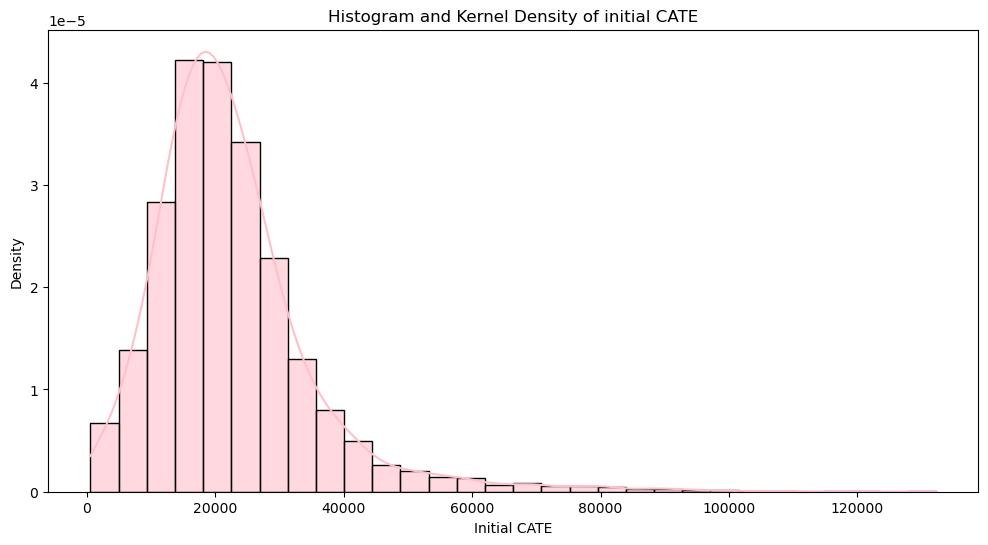

In [1786]:
## Initial CATE density:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(CATE, bins=30, kde=True, stat='density', color='pink', alpha=0.6)
plt.title('Histogram and Kernel Density of initial CATE')
plt.xlabel('Initial CATE')
plt.ylabel('Density')
plt.show()

### МНК

In [1788]:
# Оценим средний эффект воздействия с помощью МНК

# МНК оценивание уравнения цены за квадратный метр для
# квартир, рядом с которыми нет метро
import statsmodels.api as sm
y0  = df.loc[subway == 0, 'price']
x0  = df.loc[subway == 0, df.columns.drop(['price', 'bus', 'subway'])]
x0  = sm.add_constant(x0)
ls0 = sm.OLS(y0, x0).fit()

# МНК оценивание уравнения цены на квадратный метр для
# квартир, рядом с которыми есть метро
y1  = df.loc[subway == 1, ['price']]
x1  = df.loc[subway == 1, df.columns.drop(['price', 'bus', 'subway'])]
x1  = sm.add_constant(x1)
ls1 = sm.OLS(y1, x1).fit()

# Оценим цены за квадратный метр при наличии и отсутствия метро
# с помощью полученных МНК оценок
x = df.loc[:, df.columns.drop(['price', 'bus', 'subway'])]
x = sm.add_constant(x)
y = df.loc[:, 'price']

In [1790]:
  # МНК оценка E(price0 | X) для всех квартир
price0_ls = ls0.predict(x)
  # МНК оценка E(price1 | X) для всех квартир
price1_ls = ls1.predict(x)

# Оценки CATE
CATE_ls = np.array(price1_ls - price0_ls)
CATE_ls

array([30587.66320991, 19162.15948689, 16330.80452451, ...,
       28094.10425112, 25125.14025692, 22178.42140861])

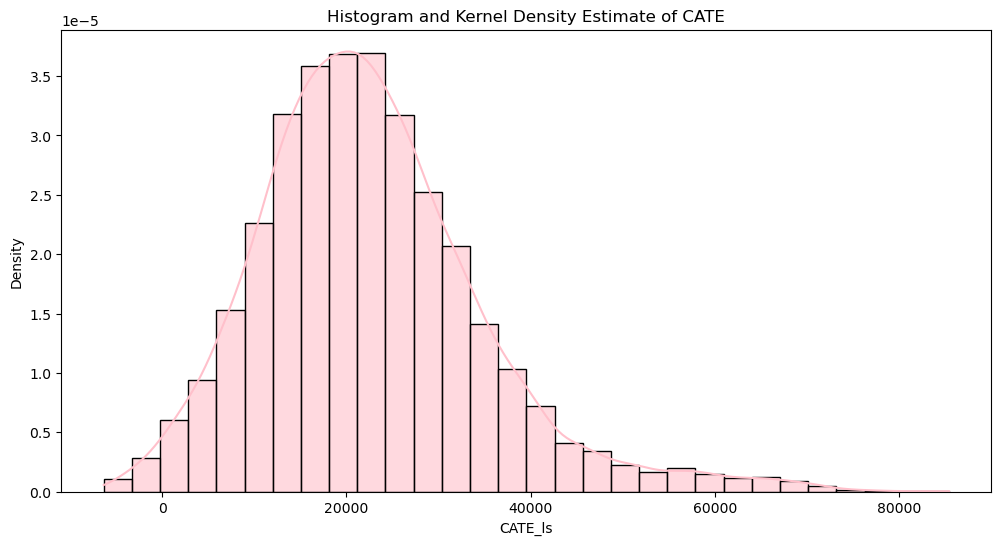

In [1792]:
## CATE_ls density:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(CATE_ls, bins=30, kde=True, stat='density', color='pink', alpha=0.6)
plt.title('Histogram and Kernel Density Estimate of CATE')
plt.xlabel('CATE_ls')
plt.ylabel('Density')
plt.show()

### S-learner

In [1794]:
df.head()

,price,subway,bus,floor,year_built,flat_area,kitchen,bathroom,rooms,floor_flat,bath,renovation,parking,primary,mkad,quality
0,457338.158679,1,1,14.0,1968.0,126.0,15.0,7.0,9.0,29.0,0,1,2,0.0,1.0,69.0
1,191722.042111,1,1,35.0,1977.0,181.0,16.0,5.0,4.0,12.0,0,2,2,1.0,1.0,82.0
2,272063.071829,1,1,28.0,1972.0,51.0,29.0,4.0,9.0,18.0,1,1,2,1.0,1.0,56.0
3,538481.255103,0,1,10.0,2004.0,111.0,29.0,6.0,5.0,36.0,1,1,2,1.0,0.0,38.0
4,257823.096712,0,1,19.0,1987.0,15.0,27.0,6.0,1.0,18.0,1,2,2,1.0,1.0,50.0


In [1796]:
# Оценивание ATE и CATE с помощью S-learner

# Подготовим данные
y = df.loc[:, ['price']]
x = df.loc[:, df.columns.drop(['price', 'bus'])]

# Подготовка модели: единая для тех квартир, рядом с которыми есть метро и для тех, у кого его нет
GB2 = GradientBoostingRegressor(random_state=0)
GB2.fit(x,y)

# Оценки E(price | X, subway = 0) для всех квартир, у которых (subway = 1).
x0= deepcopy(x)
x0["subway"] = 0
price0_GB2  = GB2.predict(x0)

# Оценки E(price | X, subway = 1) для тех квартир, у которых (subway = 0).
x1         = deepcopy(x)
x1["subway"] = 1
price1_GB2  = GB2.predict(x1)

# Оценки CATE
CATE_S = price1_GB2 - price0_GB2

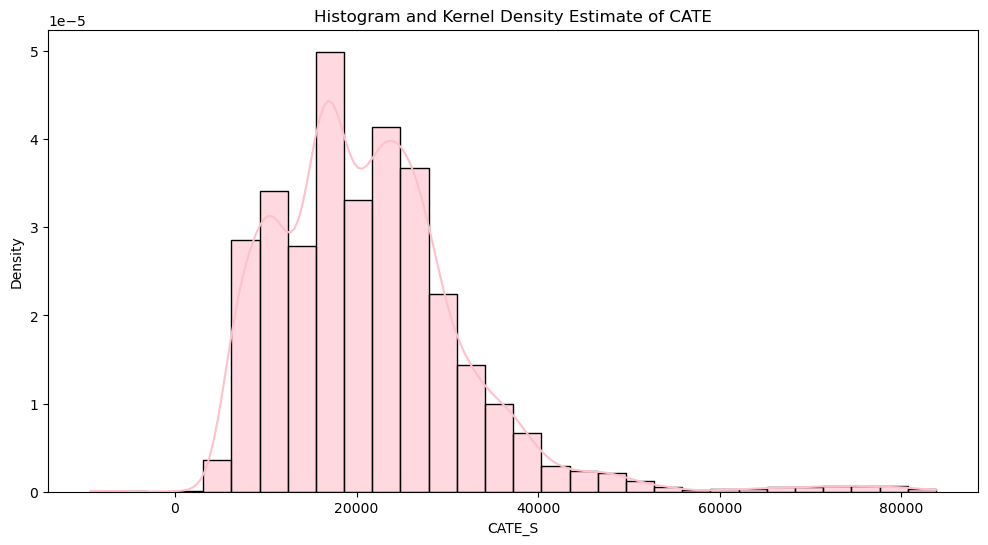

In [1798]:
## CATE_S density:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(CATE_S, bins=30, kde=True, stat='density', color='pink', alpha=0.6)
plt.title('Histogram and Kernel Density Estimate of CATE')
plt.xlabel('CATE_S')
plt.ylabel('Density')
plt.show()

### T-learner

In [1804]:
# Оценим средний эффект воздействия с помощью МНК

# МНК оценивание уравнения цены за квадратный метр для
# квартир, рядом с которыми нет метро
import statsmodels.api as sm
y0  = df.loc[subway == 0, 'price']
x0  = df.loc[subway == 0, df.columns.drop(['price', 'bus', 'subway'])]
x0  = sm.add_constant(x0)
ls0 = sm.OLS(y0, x0).fit()

# МНК оценивание уравнения цены на квадратный метр для
# квартир, рядом с которыми есть метро
y1  = df.loc[subway == 1, ['price']]
x1  = df.loc[subway == 1, df.columns.drop(['price', 'bus', 'subway'])]
x1  = sm.add_constant(x1)
ls1 = sm.OLS(y1, x1).fit()

# Оценим цены за квадратный метр при наличии и отсутствия метро
# с помощью полученных МНК оценок
x = df.loc[:, df.columns.drop(['price', 'bus', 'subway'])]
x = sm.add_constant(x)
y = df.loc[:, 'price']

# Оценивание ATE и CATE с помощью T-learner
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor(random_state=0)
# # Обучение оценивать E(price | X, subway = 0)
GB.fit(x0,y0)
# Оценки E(price | X, subway = 0) для тех квартир, у которых (subway = 1).
price0_GB = GB.predict(x)
# Обучение оценивать E(price | X, subway = 1)
GB.fit(x1, y1)
# Оценки E(price | X, subway = 1) для тех квартир, у которых(subway = 0).
price1_GB = GB.predict(x)

# # Оценки CATE
CATE_T = price1_GB - price0_GB

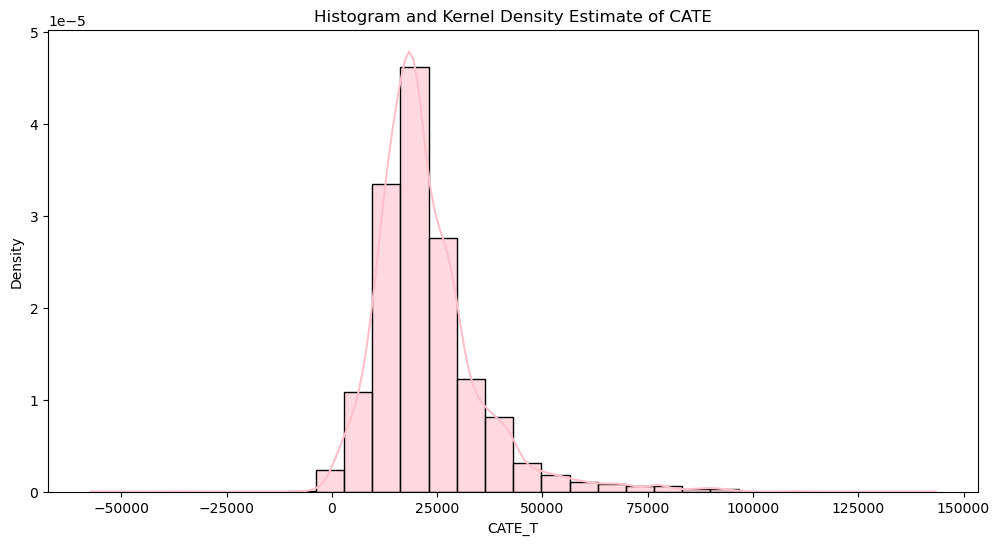

In [1805]:
## CATE_T density:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(CATE_T, bins=30, kde=True, stat='density', color='pink', alpha=0.6)
plt.title('Histogram and Kernel Density Estimate of CATE')
plt.xlabel('CATE_T')
plt.ylabel('Density')
plt.show()

### Метод трансформации классов

In [1810]:
# Оценим CATE методом трансформации классов
price_pseudo = (price * subway) / prob - (price * (1 - subway)) / (1 - prob)
x = df.loc[:, df.columns.drop(['price', 'bus', 'subway'])]

# Обучим модель с лучшими гиперпараметрами
GB_reg2 = GradientBoostingRegressor(learning_rate   =0.1,
                            min_samples_split       = 6,
                            min_samples_leaf        = 2,
                            max_depth               = 4,
                            max_features            = None,
                            subsample               = 0.75)
# # # Обучение оценивать E(price | X, subway = 0)
GB_reg2.fit(x,price_pseudo)

# Оценки CATE (метод трансформации классов)
CATE_CT = GB_reg2.predict(x)



# GB = GradientBoostingRegressor(learning_rate=0.31,max_depth=5)
# # # Обучение оценивать E(price | X, subway = 0)
# GB.fit(x,price_pseudo)
# # Оценки CATE (метод трансформации классов)
# CATE_CT = GB.predict(x)


# from sklearn.ensemble import RandomForestRegressor
# rf3 = RandomForestRegressor(max_depth=2, random_state=0)
# rf3.fit(x, price_pseudo)
# # Оценки CATE (метод трансформации классов)
# CATE_CT = rf3.predict(x)

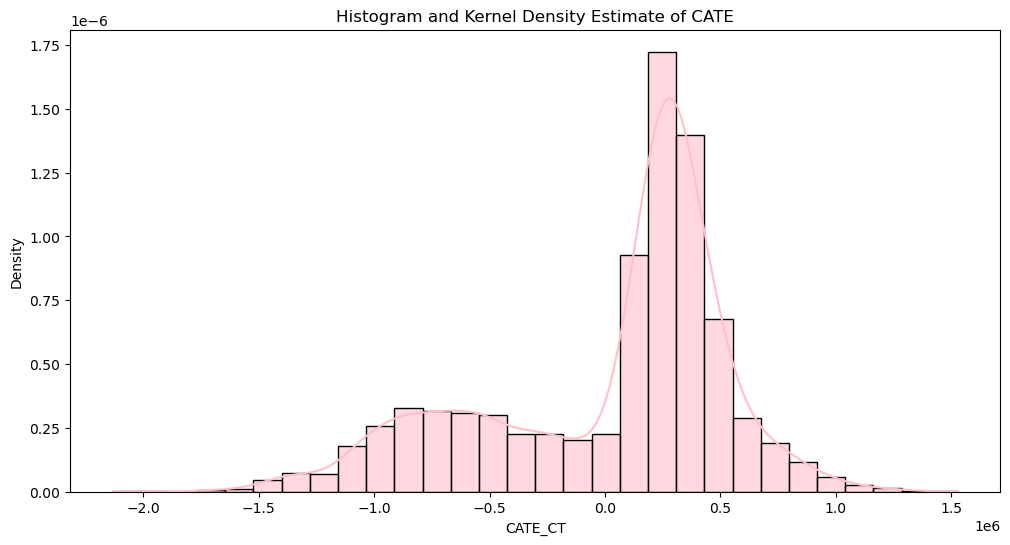

In [1812]:
## CATE_CT density:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(CATE_CT, bins=30, kde=True, stat='density', color='pink', alpha=0.6)
plt.title('Histogram and Kernel Density Estimate of CATE')
plt.xlabel('CATE_CT')
plt.ylabel('Density')
plt.show()

### Метод с двойной устойчивостью

In [1814]:
# Оценим ATE с помощью DR метода с двойной устойчивостью
CATE_DR = (price1_GB - price0_GB) + \
                 subway * (price - price1_GB) / prob - \
                 (1 - subway) * (price - price0_GB) / (1 - prob)

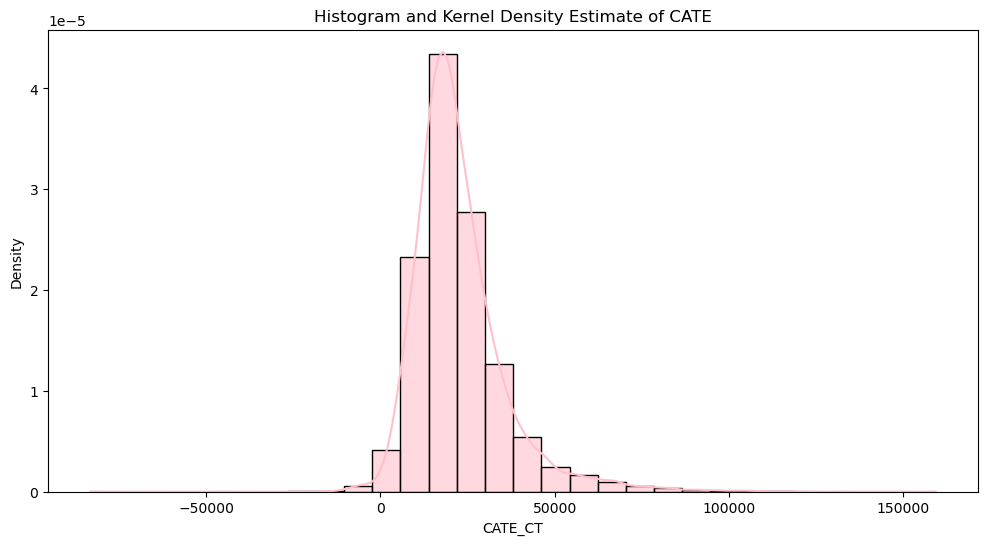

In [1816]:
## CATE_CT density:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(CATE_DR, bins=30, kde=True, stat='density', color='pink', alpha=0.6)
plt.title('Histogram and Kernel Density Estimate of CATE')
plt.xlabel('CATE_CT')
plt.ylabel('Density')
plt.show()

### X-learner

In [1818]:
# Оценивание ATE и CATE с помощью Х-learner
x = df.loc[:, df.columns.drop(['price', 'bus', 'subway'])]
y0  = df.loc[subway == 0, 'price']
x0  = df.loc[subway == 0, df.columns.drop(['price', 'bus', 'subway'])]

y1  = df.loc[subway == 1, ['price']]
x1  = df.loc[subway == 1, df.columns.drop(['price', 'bus', 'subway'])]


from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(random_state=0)

# # Обучение оценивать E(price | X, subway = 0)
GB.fit(x0,y0)
# Оценки E(price | X, subway = 0) для тех квартир, у которых (subway = 1).
price0_GB = GB.predict(x)

# Обучение оценивать E(price | X, subway = 1)
GB.fit(x1, y1)
# Оценки E(price | X, subway = 1) для тех квартир, у которых(subway = 0).
price1_GB = GB.predict(x)

D1 = np.mean(price1-price0_GB)
D0 = np.mean(price1_GB - price0)

prob_gb ## вероятность попадания в группу воздействия

# # Оценки CATE
CATE_X = (1-prob_gb)*D1 + prob_gb*D0

# Оценка ATE
ATE_X = np.mean(CATE_X)

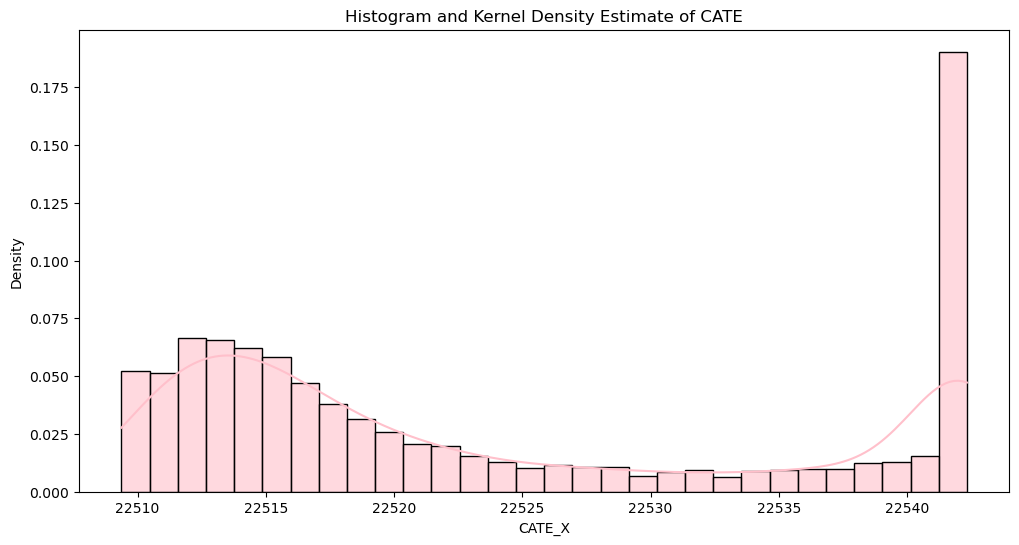

In [1820]:
## CATE_X density:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(CATE_X, bins=30, kde=True, stat='density', color='pink', alpha=0.6)
plt.title('Histogram and Kernel Density Estimate of CATE')
plt.xlabel('CATE_X')
plt.ylabel('Density')
plt.show()

In [1822]:
print(min(CATE_X))
print(max(CATE_X))
ATE

22509.371534171914
22542.333264506015


22523.67112745311

## Результаты

In [1824]:
# Сопоставим результаты
# Сопоставим результаты
print(pd.DataFrame(data    = [ATE, ATE_naive, ATE_ls,
                              ATE_T, ATE_S, ATE_IPW, ATE_DR, ATE_dml_standard, ATE_X],
                   index   = ['ATE', 'ATE naive', 'ATE ls',
                              'ATE T-learner', 'ATE S-learner',
                              'ATE IPW', 'ATE DR', 'ATE_dml_standard', 'ATE X-learner'],
                   columns = ['Оценка']))

                        Оценка
ATE               22523.671127
ATE naive         24905.065104
ATE ls            22565.563361
ATE T-learner     22528.427957
ATE S-learner     21736.269901
ATE IPW           24010.819726
ATE DR            22507.839449
ATE_dml_standard  22309.267607
ATE X-learner     22523.899171


In [1826]:
# Объединим полученные ранее оценки CATE
CATE_mat = pd.DataFrame({'True': CATE, 'OLS': CATE_ls, 'T-learner': CATE_T,
                         'S-learner': CATE_S, 'Трансформация классов': CATE_CT})
print(CATE_mat)

              True           OLS     T-learner     S-learner  \
0     30657.896753  30587.663210  33951.986554  27441.854186   
1     15104.487043  19162.159487  16765.141873  14513.372432   
2     16199.031538  16330.804525  15397.192069  11532.901721   
3     38219.407639  35995.356669  40470.147224  37698.804411   
4     11802.355677  10179.805907  12050.909981  10266.063079   
...            ...           ...           ...           ...   
9995  20153.549091  21819.911832  18877.339337  19508.972276   
9996  24885.207149  24953.005311  24108.387857  28120.318141   
9997  24447.449193  28094.104251  27742.133664  26173.633999   
9998  24421.554959  25125.140257  22715.889074  24788.670581   
9999   8282.598370  22178.421409   7116.851494  16831.926237   

      Трансформация классов  
0              3.579010e+05  
1              3.474103e+05  
2              1.820819e+04  
3             -1.110065e+06  
4             -5.650608e+05  
...                     ...  
9995           4.1321

In [1828]:
# Сравнение оценок CATE на основании истинных значений
CATE_MSE0 = pd.DataFrame(data    = [np.sqrt(np.mean((CATE_ls  - CATE) ** 2)),
                                    np.sqrt(np.mean((CATE_T   - CATE) ** 2)),
                                    np.sqrt(np.mean((CATE_S   - CATE) ** 2)),
                                    np.sqrt(np.mean((CATE_CT  - CATE) ** 2)),
                                    np.sqrt(np.mean((CATE_X  - CATE) ** 2)),
                                    np.sqrt(np.mean((CATE_DR  - CATE) ** 2))],
                         index   = ['LS', 'T-learner', 'S-learner', 'CT', 'X-learner', 'DR'],
                         columns = ['RMSE0'])
CATE_MSE0.style.format('{:.0f}')

,RMSE0
LS,3420
T-learner,3405
S-learner,4402
CT,535007
X-learner,12838
DR,4948


In [1830]:
# Сравнение CATE на основании псевдоисходов
CATE_MSE1 = pd.DataFrame(data    = [np.sqrt(np.mean((price_pseudo - CATE_ls) ** 2)),
                                    np.sqrt(np.mean((price_pseudo - CATE_T) ** 2)),
                                    np.sqrt(np.mean((price_pseudo - CATE_S) ** 2)),
                                    np.sqrt(np.mean((price_pseudo - CATE_CT) ** 2)),
                                    np.sqrt(np.mean((price_pseudo - CATE_X) ** 2)),
                                   np.sqrt(np.mean((price_pseudo - CATE_DR) ** 2))],
                         index   = ['OLS', 'T-learner', 'S-learner', 'CT', 'X-learner', 'DR'],
                         columns = ['RMSE1'])
CATE_MSE1.style.format('{:.0f}')

,RMSE1
OLS,797055
T-learner,796865
S-learner,796999
CT,558927
X-learner,797208
DR,796549
